**Table of contents**<a id='toc0_'></a>    
- [Портрет успешного абитуриента 2022-2023](#toc1_)    
  - [Imports](#toc1_1_)    
  - [Task](#toc1_2_)    
  - [Описание данных](#toc1_3_)    
  - [Load](#toc1_4_)    
  - [Transform](#toc1_5_)    
  - [EDA](#toc1_6_)    
    - [Дата подачи заявки в школу](#toc1_6_1_)    
    - [Сравнение успешных и неуспешных абитуриентов](#toc1_6_2_)    
      - [Тесты](#toc1_6_2_1_)    
    - [ОЗ](#toc1_6_3_)    
      - [ОЗ решенные задания](#toc1_6_3_1_)    
      - [Кругозор ОЗ](#toc1_6_3_2_)    
      - [Результат ОЗ, %](#toc1_6_3_3_)    
    - [Курсы](#toc1_6_4_)    
      - [Начатые курсы](#toc1_6_4_1_)    
      - [Курсы пройденные на 50%](#toc1_6_4_2_)    
    - [Олимпиады](#toc1_6_5_)    
      - [Кол-во начатых олимпиад](#toc1_6_5_1_)    
    - [Время жизни на платформе](#toc1_6_6_)    
      - [Неделя первого логина в тек. уч. году](#toc1_6_6_1_)    
      - [Неделя первого логина от 1 сентября](#toc1_6_6_2_)    
    - [Неделя логина в год регистрации](#toc1_6_7_)    
  - [Выводы](#toc1_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Портрет успешного абитуриента 2022-2023](#toc0_)

## <a id='toc1_1_'></a>[Imports](#toc0_)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from ydata_profiling import ProfileReport

LETOVO_PALETTE = ["#0D3174", "#FDC300", "#A40C30", "#00ADB9", "#B2B2B2"]
sns.set_style("darkgrid")
sns.set_palette("Set2")

plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["font.size"] = 20

YELLOW = "#FDC300"
BLUE = "#0D3174"
palette_dict = {1: YELLOW, 0: "grey"}

import warnings
warnings.filterwarnings("ignore")

PATH = '../../Выгрузки/'

## <a id='toc1_2_'></a>[Task](#toc0_)

Исследовать основных кандидатов в признаки успешности и построить __портрет успешного абитуриента__ школы Летово 2022-2023.

## <a id='toc1_3_'></a>[Описание данных](#toc0_)

__feat__: Признаки успешного абитуриента от 25.08.2022 до 01.03.2023. 

Только для тех, __кто залогинился на платформе__.

(во всех полях с тестами, курсами и т.д. NULL - означает, что не присупал)

- `lo_id` - новый ЛО ID (в схемах letovo_online) 
- `first_attempt_avg_score` - средняя оценка за начальные тесты
- `train_count_avg` - кол-во тренировочных попыток в тесте (среднее по всем предметам).
- `final_score_avg` - средняя финальная оценка за тесты
- `train_count_80_avg` - кол-во тренировочных попыток для достижения 80% в тесте (среднее по всем предметам). 
- `oz_done_count` - кол-во решенных ОЗ (с ненулевым баллом)
- `oz_subject_count` - кол-во различных предметов, в которых были набраны баллы ОЗ
- `oz_percent_avg` - средний балл за ОЗ в процентах от максимального балла за задание
- `course_start` - кол-во курсов, в которых отправлено хотя бы одно задание
- `course_50` - кол-во курсов, в которых отправлено хотя бы половина заданий
- `olymp_start` - кол-во олимпиад, в которых отправлено хотя бы одно задание
- `wave_login_first` - уч.год первого логина, 0 - текущий, 1 - предыдущий и т.д.
- `week_first_login_wave` - порядковый номер недели учебного года, когда был первый логин в год первого логина
- `week_first_login_this_year` - порядковый номер недели учебного года, когда был первый логин в этом году
- `grade` - класс ученика в данном учебном году

__claims__: Данные о заявках в школу

- `lo_id` - ID ЛО
- `recomended` - рекомендован к поступлению (без FT)
- `submitted_at` - время отправки заявки в школу

## <a id='toc1_4_'></a>[Load](#toc0_)

Основные фичи:

In [18]:
feat = pd.read_csv(PATH + 'success_features_2022_2023_up_to_03_01.csv')
feat

,lo_id,first_attempt_avg_score,train_count_avg,final_score_avg,train_count_80_avg,oz_done_count,oz_subject_count,oz_percent_avg,course_start,course_50,olymp_start,week_first_login_this_year,wave_login_first,week_first_login_wave,grade
0,528789,76.631700,1.6667,92.657333,0.6667,NaN,NaN,NaN,NaN,NaN,1.0,0,1,2,6
1,587048,NaN,NaN,NaN,NaN,4.0,1.0,80.000000,NaN,NaN,NaN,0,1,23,8
2,593642,NaN,0.0000,NaN,NaN,12.0,2.0,92.307692,NaN,NaN,NaN,0,1,37,7
3,601156,66.259233,1.3333,74.051433,1.0000,14.0,1.0,53.846154,7.0,4.0,1.0,0,1,41,8
4,527197,52.840900,9.5000,52.840900,0.0000,1.0,1.0,100.000000,8.0,6.0,NaN,0,2,42,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12617,657926,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,26,0,26,6
12618,657935,12.500000,0.0000,12.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,0,26,6
12619,657937,48.701300,1.0000,48.701300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,0,26,8
12620,648331,21.428600,0.0000,21.428600,NaN,5.0,2.0,50.000000,NaN,NaN,NaN,26,0,26,8


Построим словарь русских названий для наших признаков

In [19]:
feat_names = feat.columns[1:].tolist()
feat_names

['first_attempt_avg_score',
 'train_count_avg',
 'final_score_avg',
 'train_count_80_avg',
 'oz_done_count',
 'oz_subject_count',
 'oz_percent_avg',
 'course_start',
 'course_50',
 'olymp_start',
 'week_first_login_this_year',
 'wave_login_first',
 'week_first_login_wave',
 'grade']

In [20]:
ru_names = [
    "Результат нач. попытки, %, сред.",
    "Кол-во тренировок, сред.",
    "Финальный результат, %, сред.",
    "Кол-во тренировок до 80%, сред.",
    "Кол-во решенных ОЗ",
    "Кол-во предметов в ОЗ",
    "Средний результат ОЗ, %",
    "Кол-во начатых курсов",
    "Кол-во курсов, пройденных хотя бы на половину",
    "Кол-во начатых олимп.",
    "Неделя первого логина в тек. уч. году",
    "Уч. год первого логина",
    "Неделя первого логина",
    "Класс",
]

ru_dict = dict(zip(feat_names, ru_names))
display(len(ru_dict))
ru_dict

14

{'first_attempt_avg_score': 'Результат нач. попытки, %, сред.',
 'train_count_avg': 'Кол-во тренировок, сред.',
 'final_score_avg': 'Финальный результат, %, сред.',
 'train_count_80_avg': 'Кол-во тренировок до 80%, сред.',
 'oz_done_count': 'Кол-во решенных ОЗ',
 'oz_subject_count': 'Кол-во предметов в ОЗ',
 'oz_percent_avg': 'Средний результат ОЗ, %',
 'course_start': 'Кол-во начатых курсов',
 'course_50': 'Кол-во курсов, пройденных хотя бы на половину',
 'olymp_start': 'Кол-во начатых олимп.',
 'week_first_login_this_year': 'Неделя первого логина в тек. уч. году',
 'wave_login_first': 'Уч. год первого логина',
 'week_first_login_wave': 'Неделя первого логина',
 'grade': 'Класс'}

Ученики, подавшие заявку в школу, а также рекомендованные к поступлению (без учета Fast Track)

In [21]:
claims = pd.read_csv('../../Выгрузки/claims_recomend_2022_2023.csv', parse_dates=['submitted_at'])
claims

,lo_id,grade,submitted_at,recomended
0,538975,8,2022-09-30 22:12:40,0
1,499683,8,2022-09-28 11:08:42,0
2,600915,6,2022-09-29 22:10:20,0
3,500082,8,2022-09-01 07:18:02,0
4,505971,7,2022-09-18 11:54:59,1
...,...,...,...,...
4589,625282,7,2022-10-28 06:57:24,0
4590,625271,7,2022-10-28 09:11:40,0
4591,625150,7,2022-10-28 03:13:42,0
4592,625146,7,2022-10-27 21:34:54,0


## <a id='toc1_5_'></a>[Transform](#toc0_)

Посмотрим, для каких заявок удалось на самом деле расчитать какие-то значимые признаки

In [22]:
df = claims[['lo_id', 'recomended']].merge(feat, on='lo_id', how='left').dropna(how='all', axis=0, subset=feat.columns[1:])
df

,lo_id,recomended,first_attempt_avg_score,train_count_avg,final_score_avg,train_count_80_avg,oz_done_count,oz_subject_count,oz_percent_avg,course_start,course_50,olymp_start,week_first_login_this_year,wave_login_first,week_first_login_wave,grade
0,538975,0,77.941200,0.6667,86.764700,0.0000,NaN,NaN,NaN,4.0,NaN,1.0,0.0,1.0,15.0,8.0
1,499683,0,42.538833,1.6667,55.742300,0.0000,3.0,1.0,33.333333,1.0,NaN,1.0,0.0,3.0,38.0,8.0
3,500082,0,53.883367,3.0000,83.295133,2.3333,1.0,1.0,50.000000,3.0,1.0,NaN,0.0,3.0,40.0,8.0
4,505971,1,51.988667,5.0000,100.000000,2.3333,29.0,1.0,61.702128,1.0,NaN,NaN,1.0,2.0,11.0,7.0
5,574074,0,73.484867,7.6667,100.000000,0.6667,59.0,2.0,86.764706,2.0,1.0,1.0,1.0,1.0,12.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,625507,0,15.625000,0.0000,15.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,9.0,7.0
4587,625473,0,27.272700,0.0000,27.272700,NaN,13.0,3.0,61.904762,NaN,NaN,1.0,10.0,0.0,10.0,7.0
4589,625282,0,18.750000,0.0000,18.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,9.0,7.0
4591,625150,0,57.954567,14.0000,100.000000,1.6667,5.0,1.0,45.454545,2.0,1.0,NaN,9.0,0.0,9.0,7.0


In [36]:
print(f'Число заявок в школу, которые логинились на ЛО: {df.shape[0]}.')

Число заявок в школу, которые логинились на ЛО: 3216.


In [34]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file('success_portrait_ydata.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 51.01it/s]


## <a id='toc1_6_'></a>[EDA](#toc0_)

### <a id='toc1_6_1_'></a>[Дата подачи заявки в школу](#toc0_)

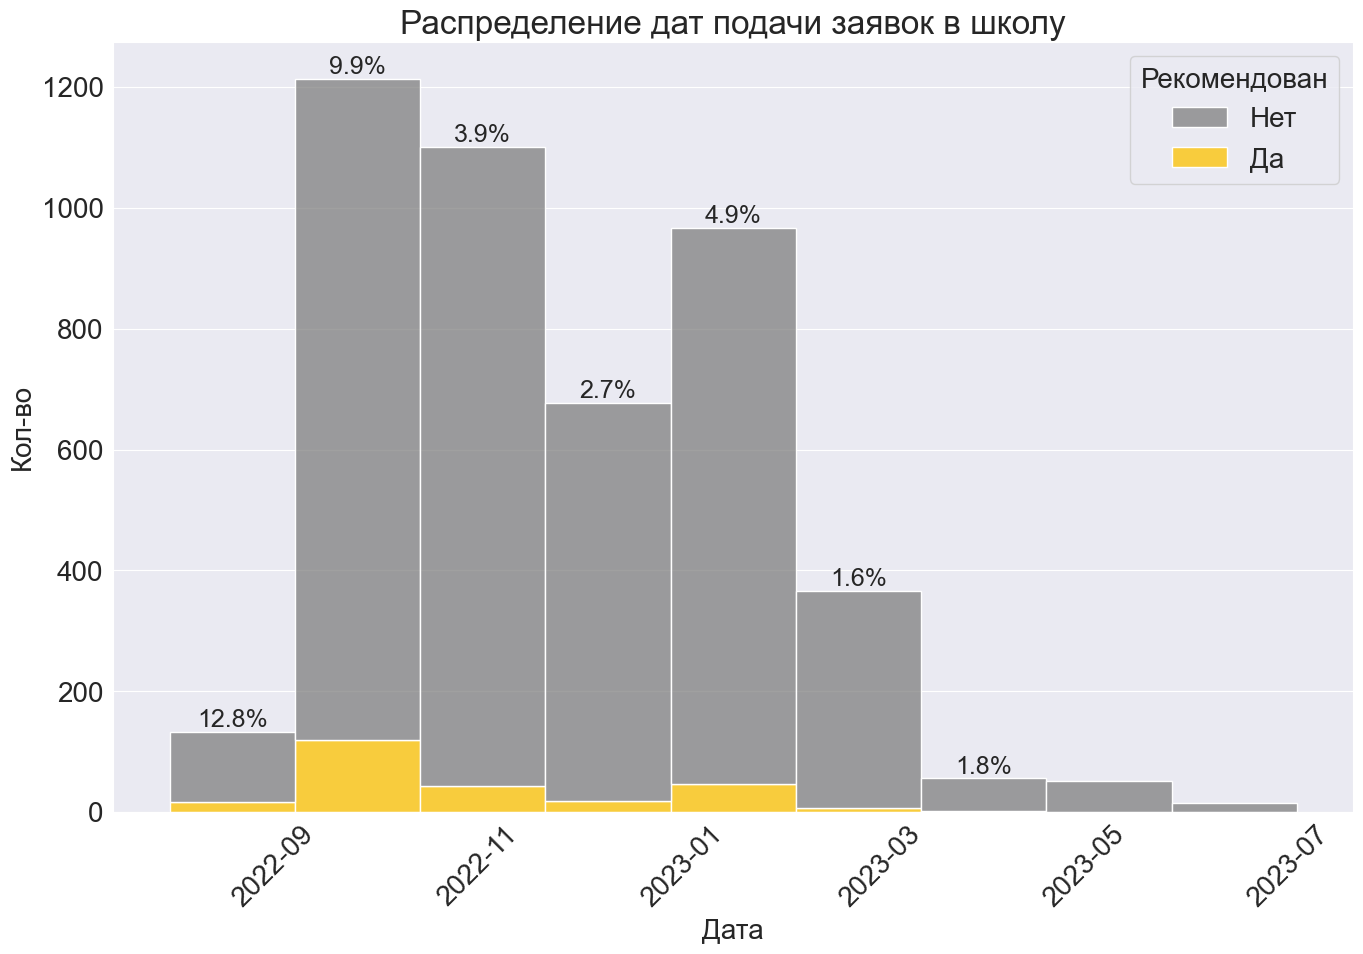

In [23]:
def histplot_hue_percent(data, x, hue, title=None, xlabel=None, ylabel=None, hue_legend_labels=None, hue_legend_title=None, palette=None, bins=9):    
    ax = sns.histplot(data=data, x=x, hue=hue, palette=palette, multiple='stack', bins=bins)
    #ax.xaxis.set_major_formatter(ticker.PercentFormatter(1, decimals=0))
    percents = [f'{x.get_height() / (x.get_height() + y.get_height()):.1%}' if x.get_height()!=0 else '' for x, y  in zip(ax.containers[0], ax.containers[1])]
    ax.bar_label(ax.containers[1], percents, fontsize=18)
    
    plt.grid(axis='x')
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if hue_legend_labels:
        legend = ax.get_legend()
        handles = legend.legendHandles
        labels = hue_legend_labels
        ax.legend(handles, labels, title=hue_legend_title)
    return ax
histplot_hue_percent(data=claims, x='submitted_at', hue='recomended', palette=palette_dict,
                     title='Распределение дат подачи заявок в школу', 
                     xlabel='Дата', ylabel='Кол-во',
                     hue_legend_labels=['Нет', 'Да'], hue_legend_title='Рекомендован')
plt.xticks(rotation=45)
plt.show()

<Axes: >

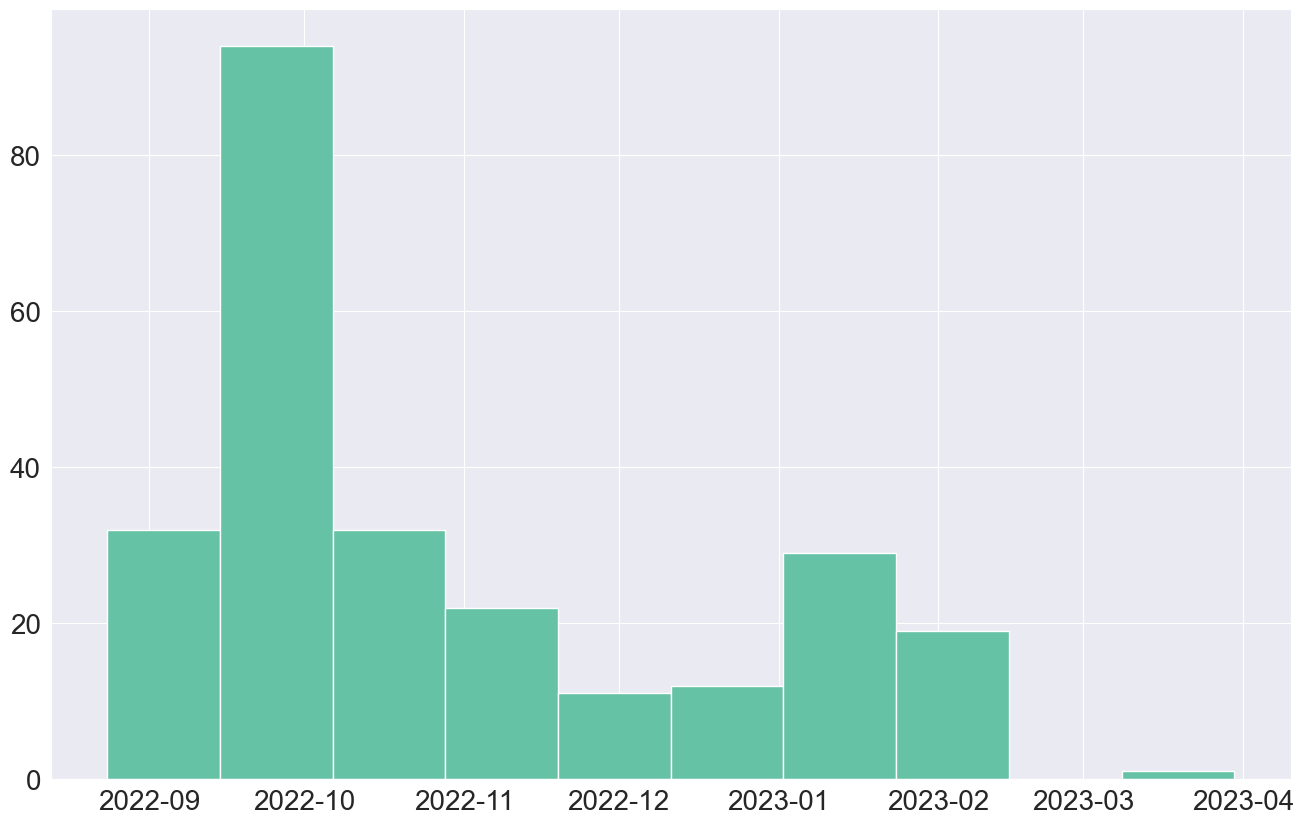

In [24]:
claims[claims['recomended'] == 1]['submitted_at'].hist()

Видим, что почти все рекомендованные ученики подавали заявки до конца февраля 2023. Этим и мотивируется наше стремление брать признаки, расчитанные на конец февраля.

### <a id='toc1_6_2_'></a>[Сравнение успешных и неуспешных абитуриентов](#toc0_)

In [25]:
def continuous_by_groups_plot(df: pd.DataFrame, x: str, y: str, outliers=False,
                              order=None,
                              title: str=None, xlabel: str=None, ylabel: str=None, palette='Set2',
                              xticks: str=None,
                              hue: str=None, hue_legend_labels: str=None, hue_legend_title: str=None, ax=None):

  ax = sns.boxplot(data=df, x=x, y=y, showfliers=outliers,
                   hue=hue, palette=palette, order=order,
                   medianprops={'linewidth':'3'}, ax=ax)
  if title:
    ax.set_title(title)
  if xlabel:
    ax.set_xlabel(xlabel)
  if ylabel:
    ax.set_ylabel(ylabel)
  if hue_legend_title:
    handles, labels = ax.get_legend_handles_labels()
    if hue_legend_labels:
      labels = hue_legend_labels
    ax.legend(handles, labels, title=hue_legend_title)

  if xticks:
    ticks = ax.get_xticks()
    ax.set_xticks(ticks, labels = xticks)

  return ax

#### <a id='toc1_6_2_1_'></a>[Тесты](#toc0_)

In [26]:
feat_names[0]

'first_attempt_avg_score'

__Результат начальной попытки в тесте__

,count,mean,std,min,25%,50%,75%,max
recomended,,,,,,,,
0,2676.0,49.39,23.04,0.00,32.35,51.06,66.87,100.00
1,234.0,67.25,16.15,5.88,55.78,68.68,79.31,96.15


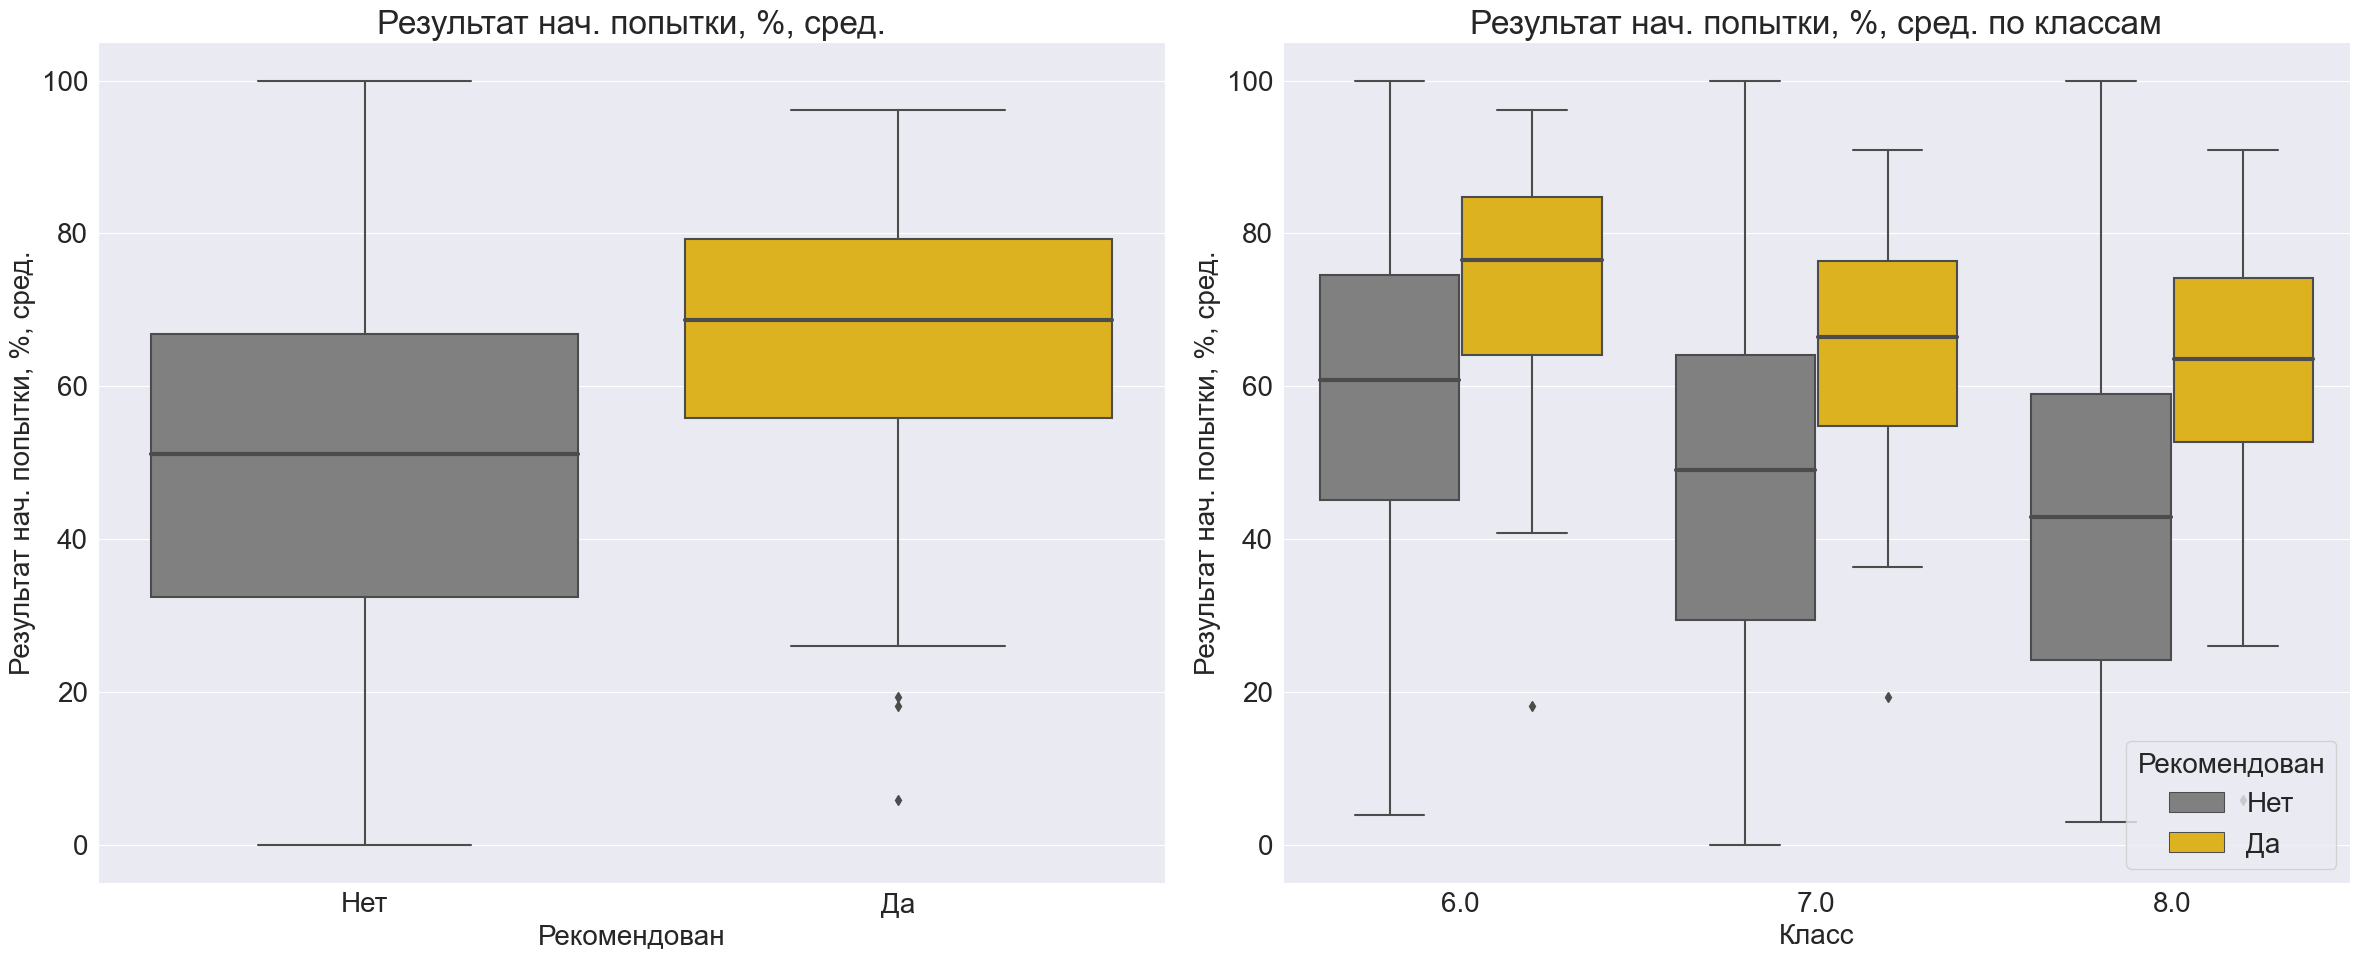

count   mean    std    min    25%    50%    75%     max
grade recomended                                                         
6.0   0           908.0  58.55  20.79   3.85  45.14  60.77  74.58  100.00
      1            94.0  73.16  15.10  18.18  64.02  76.57  84.79   96.15
7.0   0           898.0  47.09  22.64   0.00  29.36  49.01  64.11  100.00
      1            80.0  64.16  14.93  19.32  54.76  66.43  76.38   90.91
8.0   0           870.0  42.21  22.57   2.94  24.12  42.86  59.01  100.00
      1            60.0  62.09  16.61   5.88  52.73  63.54  74.12   90.91

In [28]:
def compare(feature:str, df=df, outliers=True):
    fig, ax = plt.subplots(1, 2, figsize=(24, 10))

    ax[0] = continuous_by_groups_plot(
        df, 'recomended', feature, 
        title=ru_dict[feature],
        xlabel='Рекомендован', 
        ylabel= ru_dict[feature],
        xticks=['Нет', 'Да'],
        palette=palette_dict,
        outliers=outliers,
        ax=ax[0])

    display(df.groupby('recomended')[feature].describe().round(2))

    ax[1] = continuous_by_groups_plot(
        df, 'grade', feature, 
        title=ru_dict[feature] + " по классам", 
        xlabel = ru_dict['grade'],
        ylabel= ru_dict[feature],
        outliers=outliers, palette=palette_dict,
        hue='recomended', hue_legend_title='Рекомендован', hue_legend_labels=['Нет','Да'],
        ax=ax[1])
    plt.tight_layout()
    plt.show()

    display(df.groupby(['grade', 'recomended'])[feature].describe().round(2))

compare(feat_names[0])
    

- Во всех классах видим существенную разницу в пользу успешных абитуриентов.
- Разница медиан по классам не меньше 16%.
- Результаты во всех группах лучше в 6-м классе.

__Кол-во тренировок__.

,count,mean,std,min,25%,50%,75%,max
recomended,,,,,,,,
0,2807.0,3.30,7.33,0.0,0.0,1.00,3.67,131.00
1,234.0,6.31,17.98,0.0,1.0,2.58,5.67,248.67


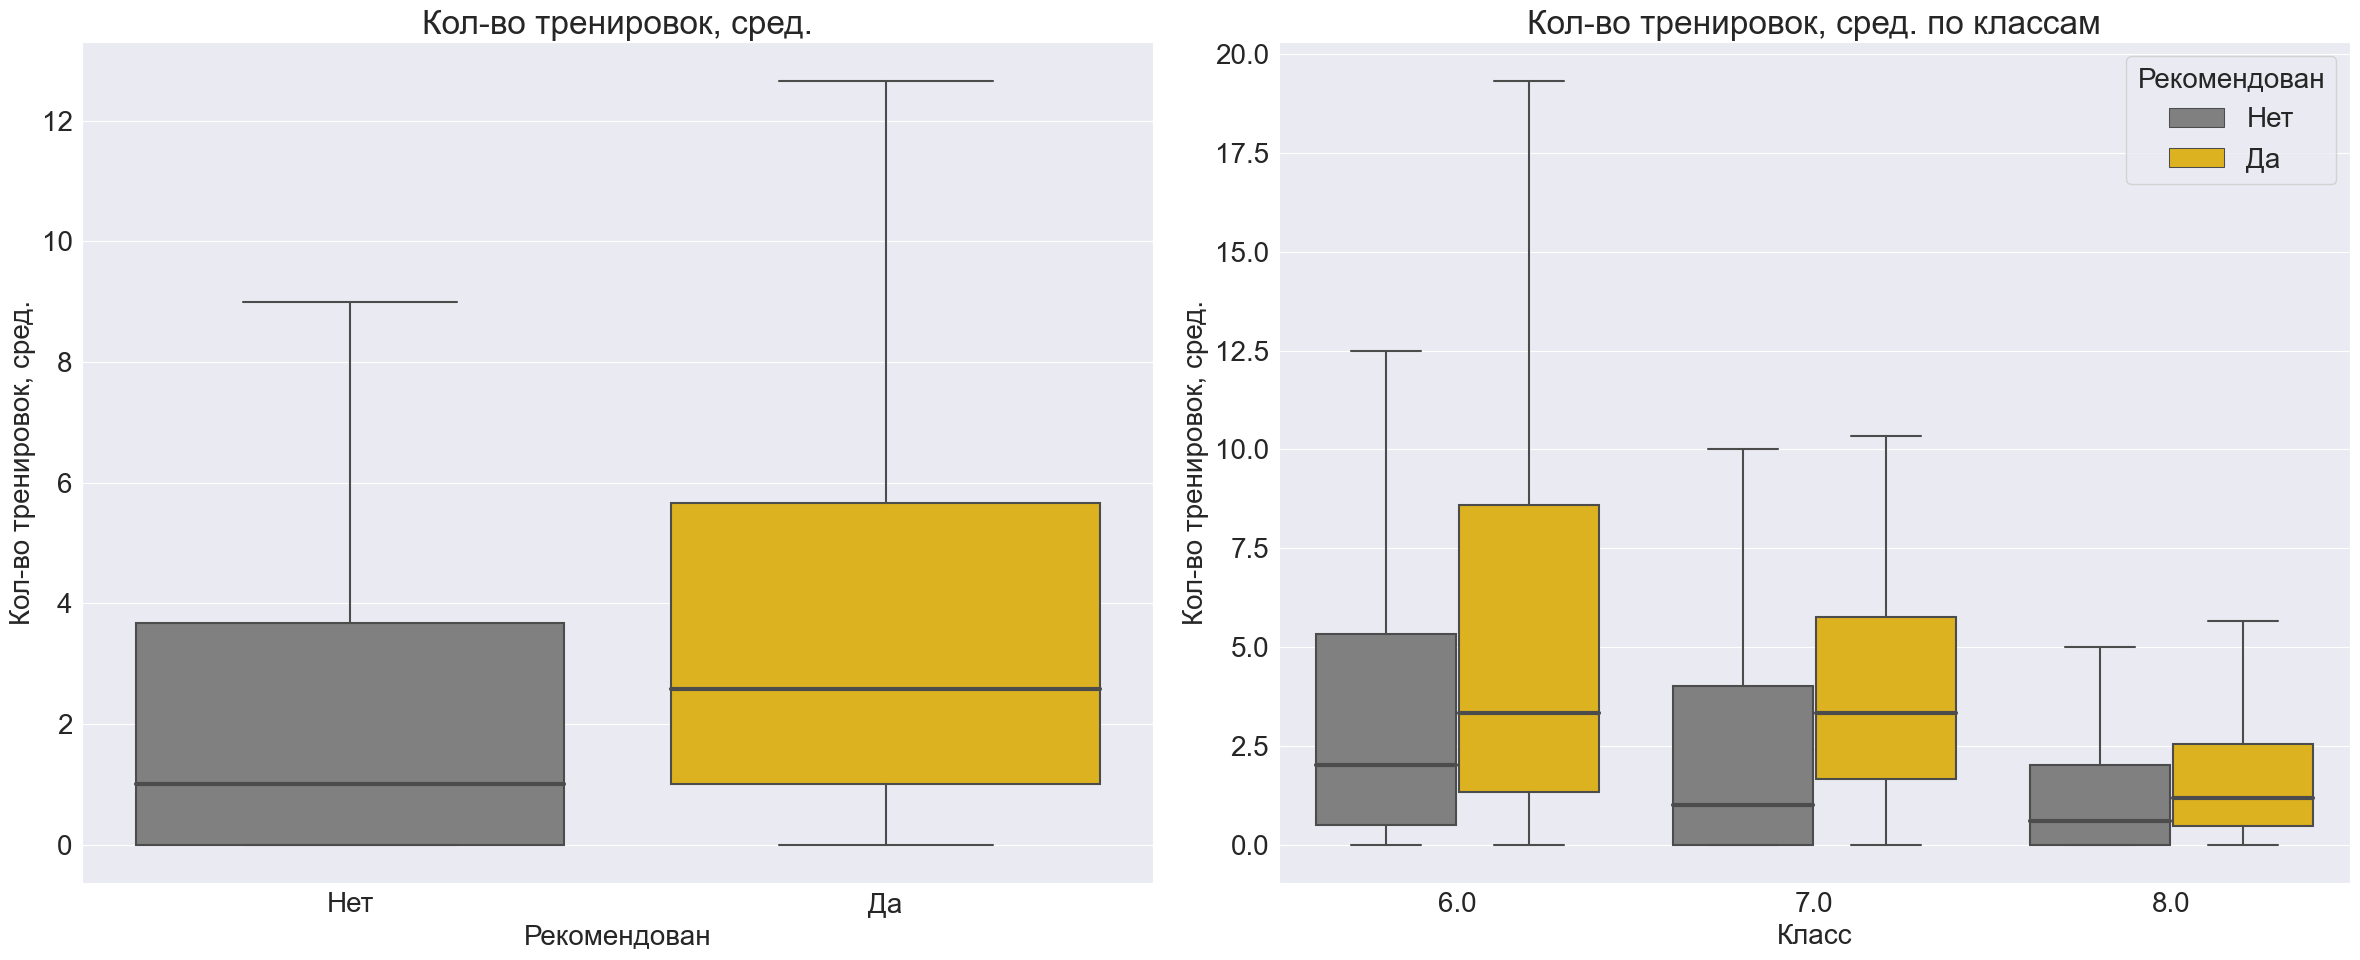

count  mean    std  min   25%   50%   75%     max
grade recomended                                                   
6.0   0           937.0  5.01  10.49  0.0  0.50  2.00  5.33  131.00
      1            94.0  9.69  26.83  0.0  1.33  3.33  8.58  248.67
7.0   0           918.0  3.29   6.17  0.0  0.00  1.00  4.00   90.67
      1            80.0  5.40   8.47  0.0  1.67  3.33  5.75   55.00
8.0   0           952.0  1.64   2.82  0.0  0.00  0.58  2.00   31.67
      1            60.0  2.25   3.00  0.0  0.46  1.17  2.54   18.67

In [29]:
compare(feat_names[1], outliers=False)

- В целом успешные абитуриенты __тренируются больше__, чем неуспешные.
- В 8м классе ощутимо меньше, чем в 6 и 7.

In [15]:
feat_names[2]

'final_score_avg'

__Финальный результат тестов__ (на 01.03.2023)

,count,mean,std,min,25%,50%,75%,max
recomended,,,,,,,,
0,2676.0,65.92,30.13,2.94,42.47,76.61,91.74,100.0
1,234.0,88.51,15.34,5.88,85.70,92.76,100.00,100.0


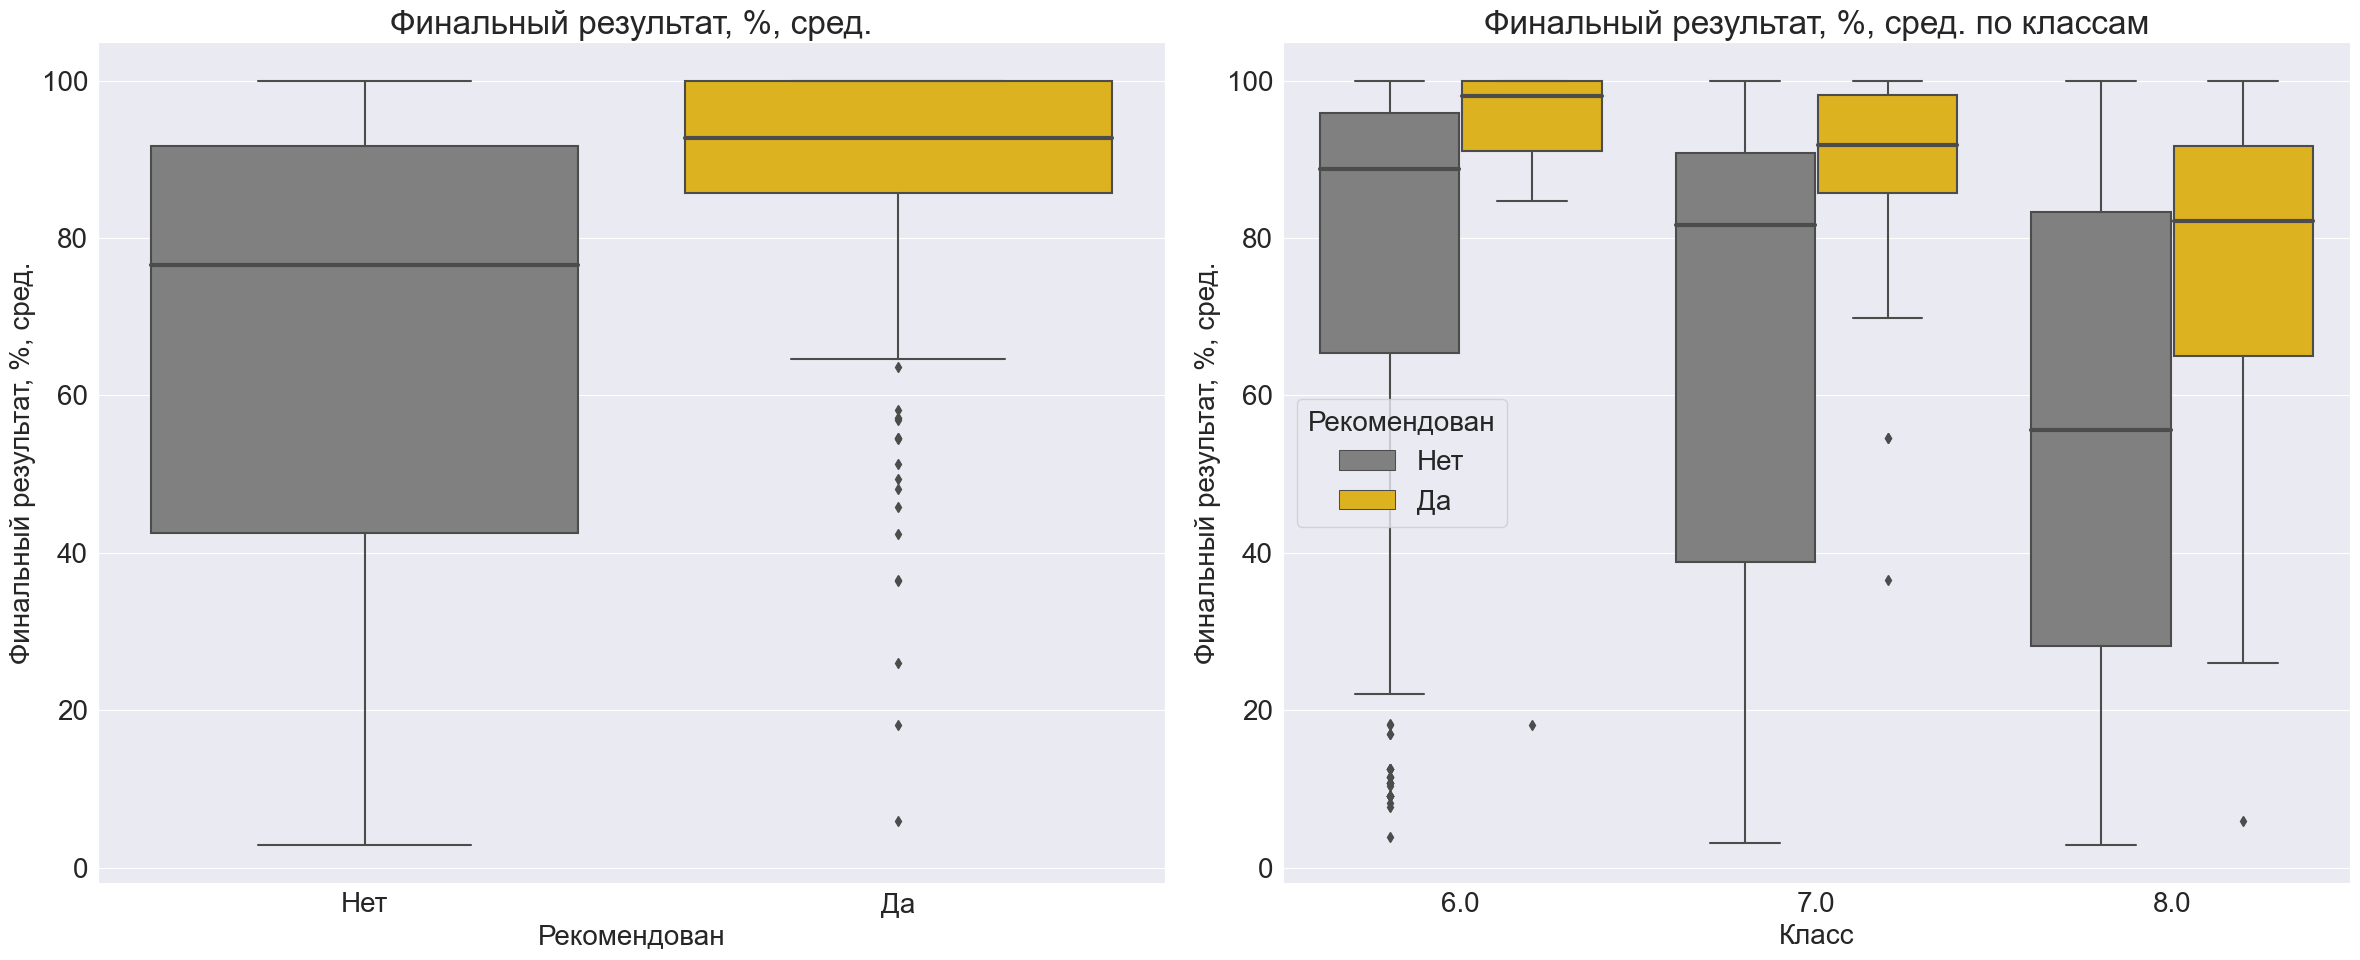

count   mean    std    min    25%    50%     75%    max
grade recomended                                                         
6.0   0           908.0  78.45  24.46   3.85  65.37  88.81   95.83  100.0
      1            94.0  94.93   9.41  18.18  91.06  98.08  100.00  100.0
7.0   0           898.0  64.72  30.83   3.12  38.81  81.63   90.81  100.0
      1            80.0  89.92  11.19  36.55  85.70  91.76   98.18  100.0
8.0   0           870.0  54.07  29.71   2.94  28.15  55.56   83.30  100.0
      1            60.0  76.55  20.20   5.88  65.00  82.11   91.67  100.0

In [31]:
compare(feat_names[2])

Та же картина, что и для начальных тестов

__Кол-во тренировок до 80%__.

In [11]:

def barplot_binary(data: pd.DataFrame, x: str, y: str, estimator_type='percent', orient: str='v',
                   order= None,
    title=None, xlabel=None, ylabel=None,
    hue: str=None, ticklabels: list=None, palette='Set2',
    hue_legend_labels: list=None, hue_legend_title: str=None,
    label_fontsize=20):
    if estimator_type == 'percent':
      estimator = np.mean
    if estimator_type == 'sum':
      estimator = np.sum
    ax = sns.barplot(data=data, x=x, y=y, hue=hue, ci=0,
                     palette=palette, estimator=estimator,
                     order=order)
    if estimator_type == 'percent':
      if orient == 'v':
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1, decimals=0))
      if orient == 'h':
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(1, decimals=0))


    if ticklabels:
        ax.set_xticklabels(ticklabels)

    if hue_legend_title:
        handles, labels = ax.get_legend_handles_labels()
        if hue_legend_labels:
          labels = hue_legend_labels
        ax.legend(handles, labels, title=hue_legend_title)
    if title or xlabel or ylabel:
      ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    if estimator_type == 'percent':
      if orient == 'v':
        if hue:
          hue_size = data[hue].nunique()
          for i in range(hue_size):
            ax.bar_label(ax.containers[i], labels = [f'{x.get_height():.1%}' for x in ax.containers[i]], fontsize=label_fontsize)
        else:
          ax.bar_label(ax.containers[0], labels = [f'{x.get_height():.1%}' for x in ax.containers[0]], fontsize=label_fontsize)
      if orient == 'h':
        if hue:
          hue_size = data[hue].nunique()
          for i in range(hue_size):
            ax.bar_label(ax.containers[i], labels = [f'{x.get_width():.1%}' for x in ax.containers[i]], fontsize=label_fontsize)
        else:
          ax.bar_label(ax.containers[0], labels = [f'{x.get_width():.1%}' for x in ax.containers[0]], fontsize=label_fontsize)

    if estimator_type == 'sum':
      if orient == 'v':
        if hue:
          hue_size = data[hue].nunique()
          for i in range(hue_size):
            ax.bar_label(ax.containers[i], labels = [f'{x.get_height():.0f}' for x in ax.containers[i]], fontsize=label_fontsize)
        else:
          ax.bar_label(ax.containers[0], labels = [f'{x.get_height():.0f}' for x in ax.containers[0]], fontsize=label_fontsize)
      if orient == 'h':
        if hue:
          hue_size = data[hue].nunique()
          for i in range(hue_size):
            ax.bar_label(ax.containers[i], labels = [f'{x.get_width():.0f}' for x in ax.containers[i]], fontsize=label_fontsize)
        else:
          ax.bar_label(ax.containers[0], labels = [f'{x.get_width():.0f}' for x in ax.containers[0]], fontsize=label_fontsize)

    return ax

,count,mean,std,min,25%,50%,75%,max
recomended,,,,,,,,
0,1687.0,1.36,1.20,0.0,0.33,1.0,2.0,8.33
1,223.0,1.01,0.81,0.0,0.33,1.0,1.5,4.00


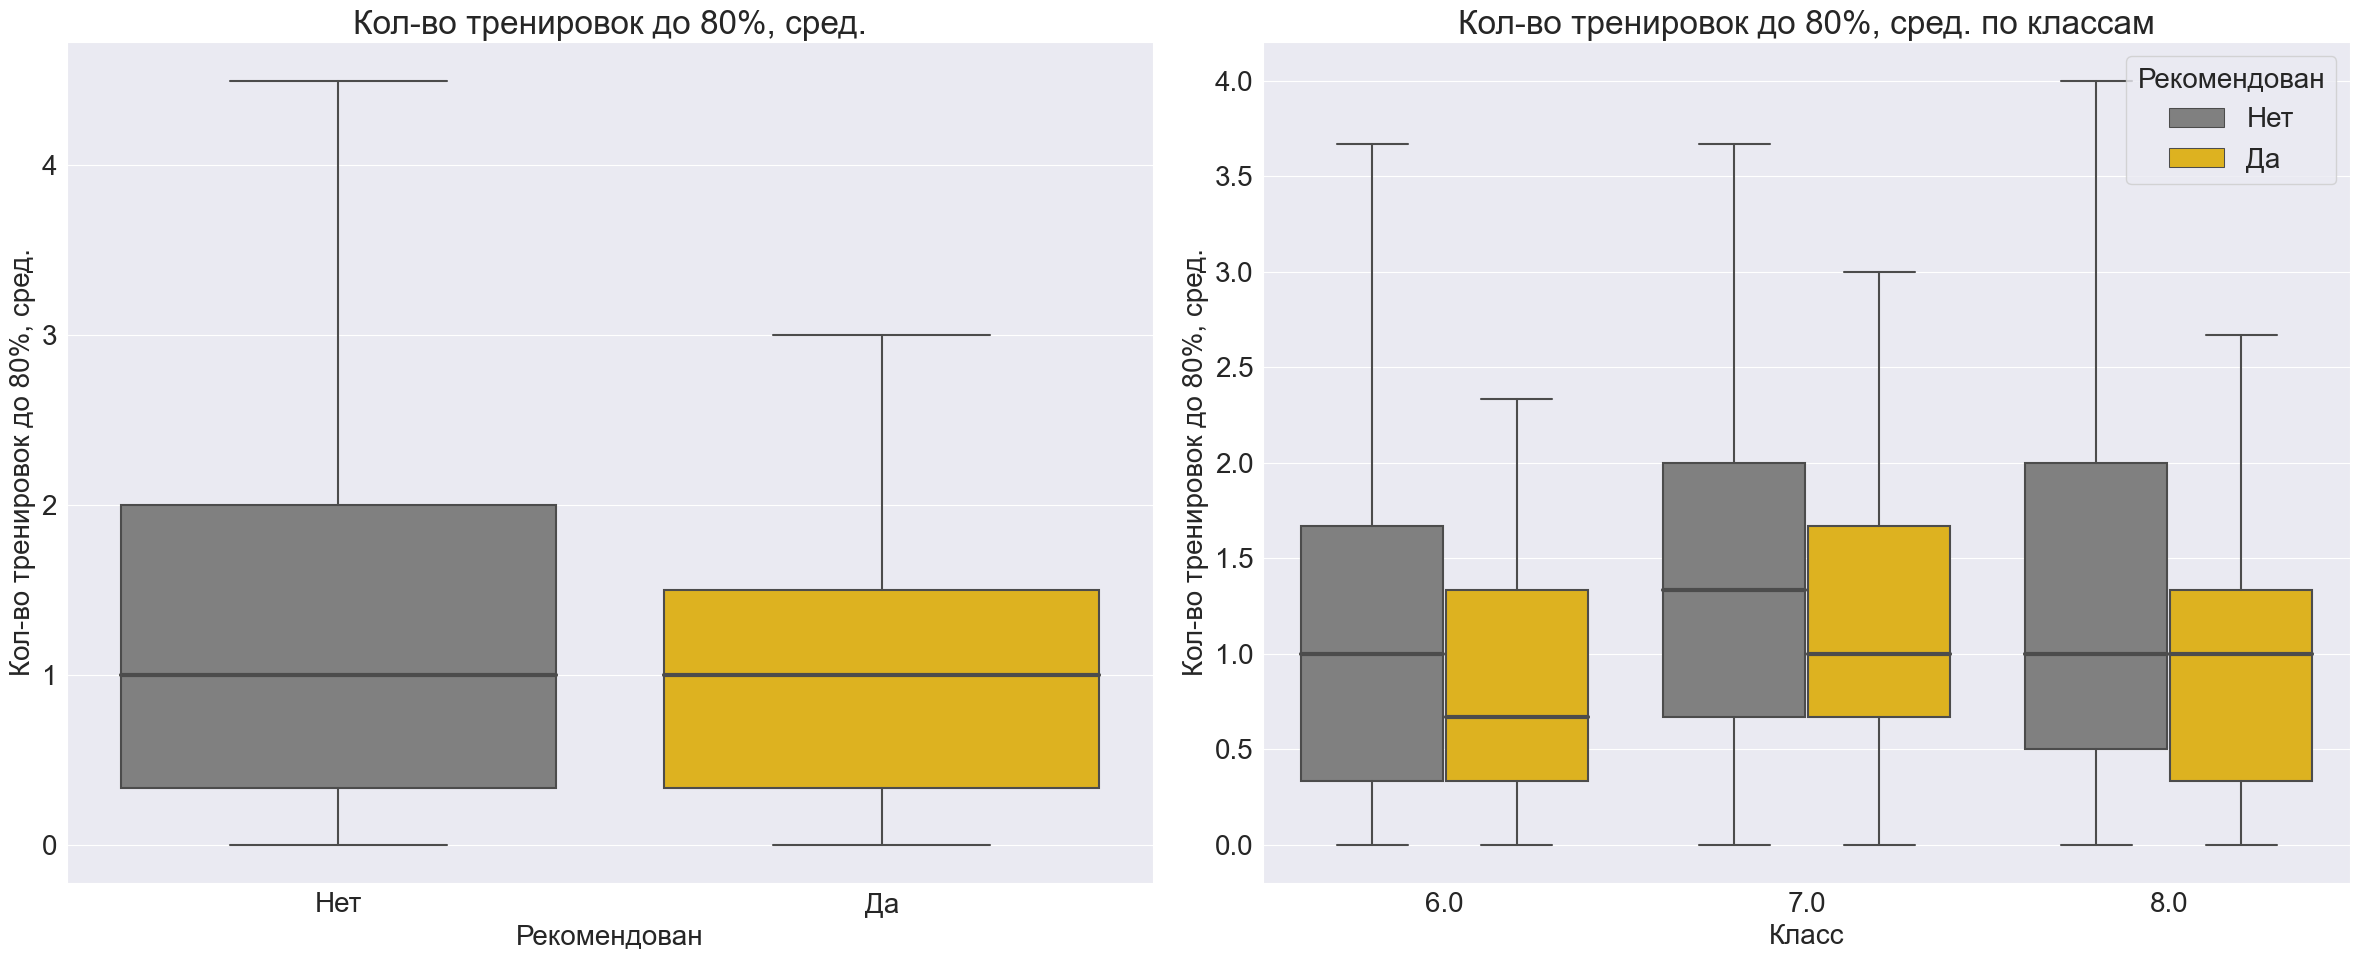

count  mean   std  min   25%   50%   75%   max
grade recomended                                                
6.0   0           680.0  1.14  1.00  0.0  0.33  1.00  1.67  6.00
      1            93.0  0.84  0.73  0.0  0.33  0.67  1.33  3.33
7.0   0           579.0  1.50  1.27  0.0  0.67  1.33  2.00  8.33
      1            77.0  1.29  0.89  0.0  0.67  1.00  1.67  4.00
8.0   0           428.0  1.52  1.33  0.0  0.50  1.00  2.00  6.67
      1            53.0  0.90  0.71  0.0  0.33  1.00  1.33  2.67

In [38]:
compare(feat_names[3], outliers=False)

- В 6 и 7 классе медианы среднего кол-ва тренировок до успеха в тесте ниже у успешных абитуриентов. В 8 классе они совпадают.
- В целом можно отметить меньший разброс и меньшие квартили для успешных
- Медианы в целом равны 1 тренировке.

### <a id='toc1_6_3_'></a>[ОЗ](#toc0_)

#### <a id='toc1_6_3_1_'></a>[ОЗ решенные задания](#toc0_)

,count,mean,std,min,25%,50%,75%,max
recomended,,,,,,,,
0,1437.0,9.10,12.51,0.0,1.0,5.0,12.0,101.0
1,167.0,17.72,24.55,0.0,3.0,10.0,26.5,237.0


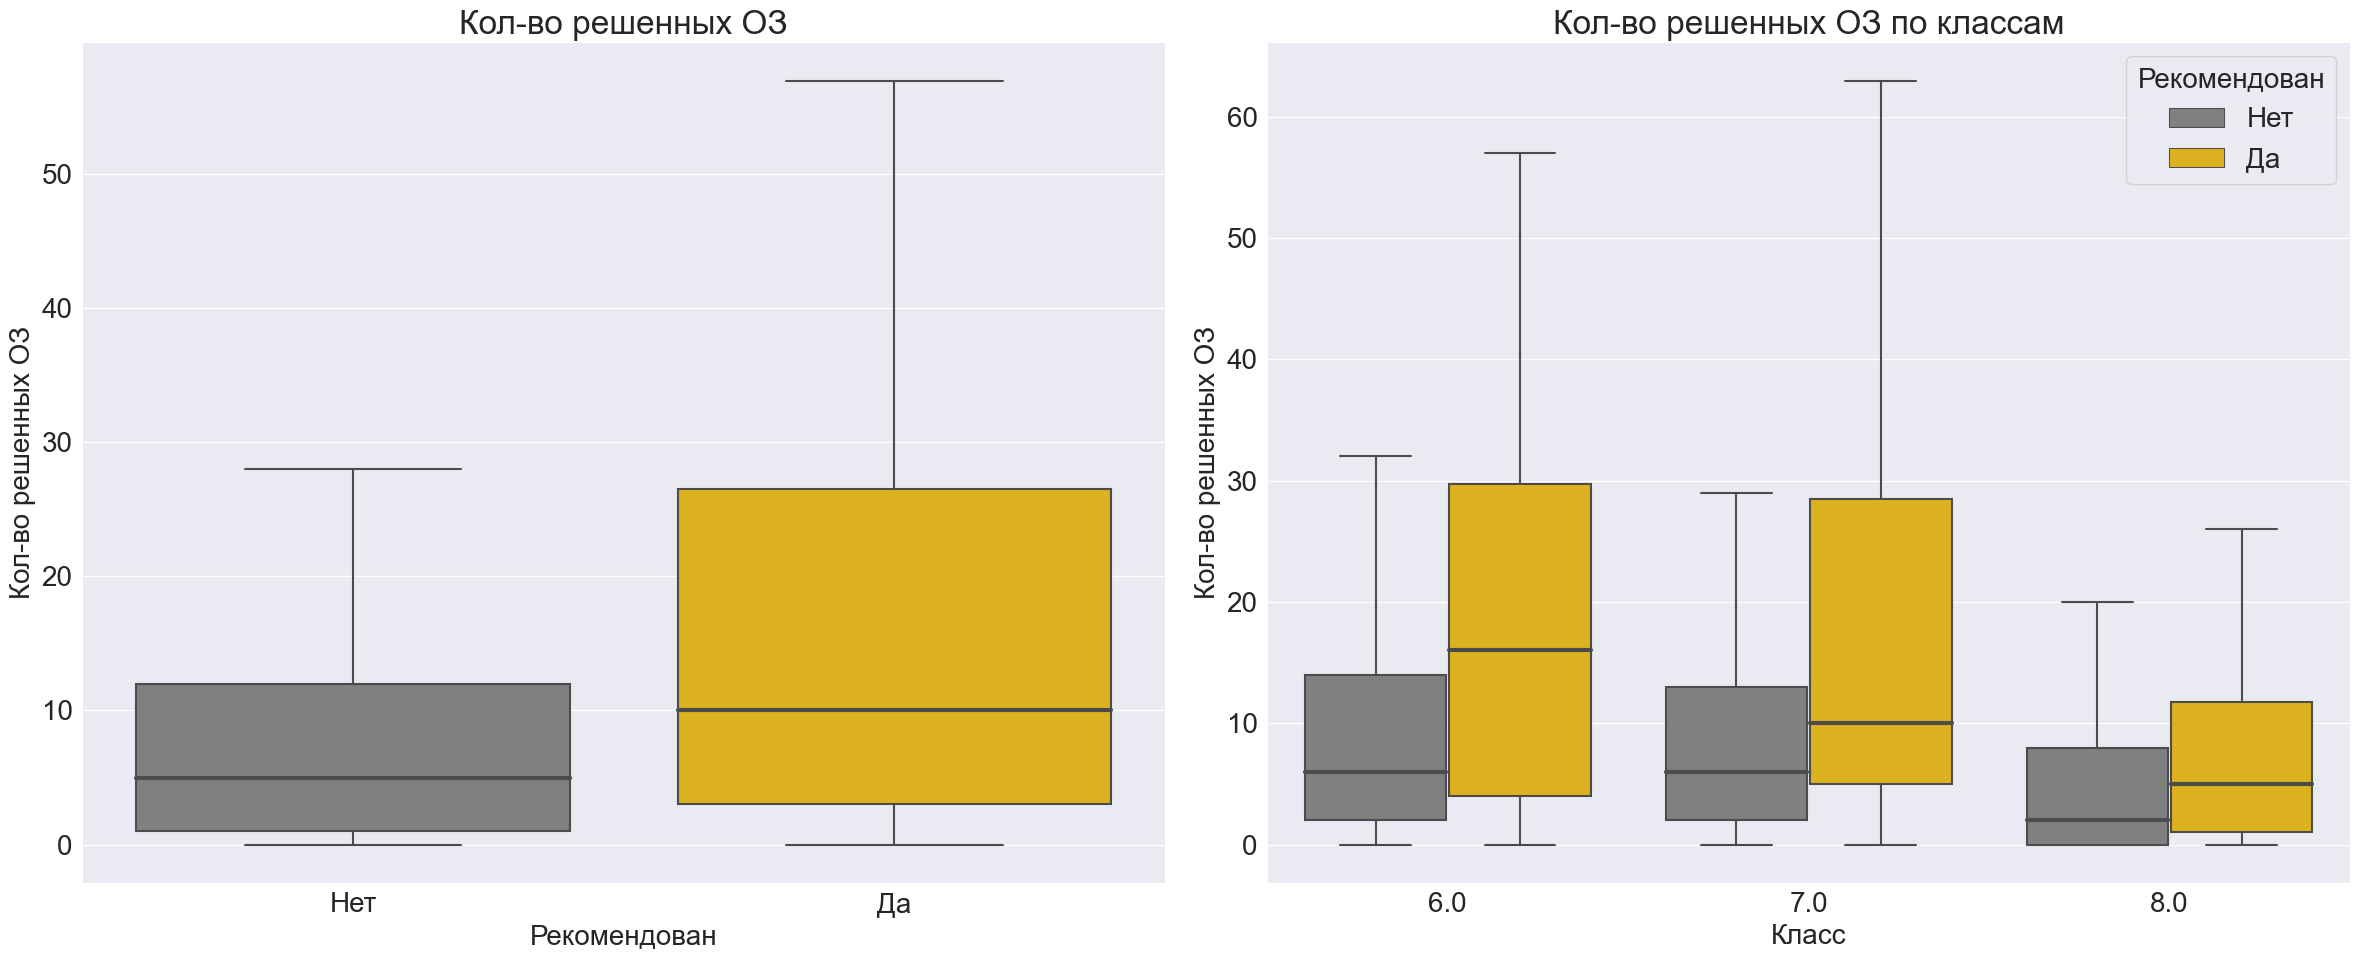

count   mean    std  min  25%   50%    75%    max
grade recomended                                                   
6.0   0           518.0  10.57  13.52  0.0  2.0   6.0  14.00   92.0
      1            74.0  22.43  31.40  0.0  4.0  16.0  29.75  237.0
7.0   0           441.0  11.14  14.64  0.0  2.0   6.0  13.00  101.0
      1            51.0  17.57  18.34  0.0  5.0  10.0  28.50   71.0
8.0   0           478.0   5.64   7.58  0.0  0.0   2.0   8.00   35.0
      1            42.0   9.60  12.89  0.0  1.0   5.0  11.75   63.0

In [41]:
compare(feat_names[4], outliers=False)

- В среднем успешные решают на 5 ОЗ больше
- Медианы:
    - Успех - 10
    - Нет - 5
- Самое большое кол-во в 6 классе, в 8-м - самое маленькое
- Во всех классах также видим разницу в пользу успешных

Необходимо отметить, что например распредление решенных ОЗ для успешных 8 класса почти такое же, как распределение для неуспешных 6 класса. Это наталкивает на мысль, что нужно либо обучать модель отдельно на каждом классе, либо же включать класс как признак, с весами, чтобы нивелировать разницу в кол-ве рекомендованных по классам.

In [42]:
success_count = df[df['recomended'] == 1].grade.value_counts()
all_count = df.grade.value_counts()

(success_count / all_count * 100).round(1).apply(lambda x: str(x) + '%')

6.0    8.8%
7.0    7.9%
8.0    5.5%
Name: grade, dtype: object

Мы видим, что процент рекомендованных несколько выше в 6м классе, а значит нужно либо как-то добавлять веса признаку "Класс", либо обучать три разных модели.

#### <a id='toc1_6_3_2_'></a>[Кругозор ОЗ](#toc0_)

,count,mean,std,min,25%,50%,75%,max
recomended,,,,,,,,
0,1158.0,1.74,1.18,1.0,1.0,1.0,2.0,14.0
1,152.0,2.13,1.60,1.0,1.0,2.0,3.0,15.0


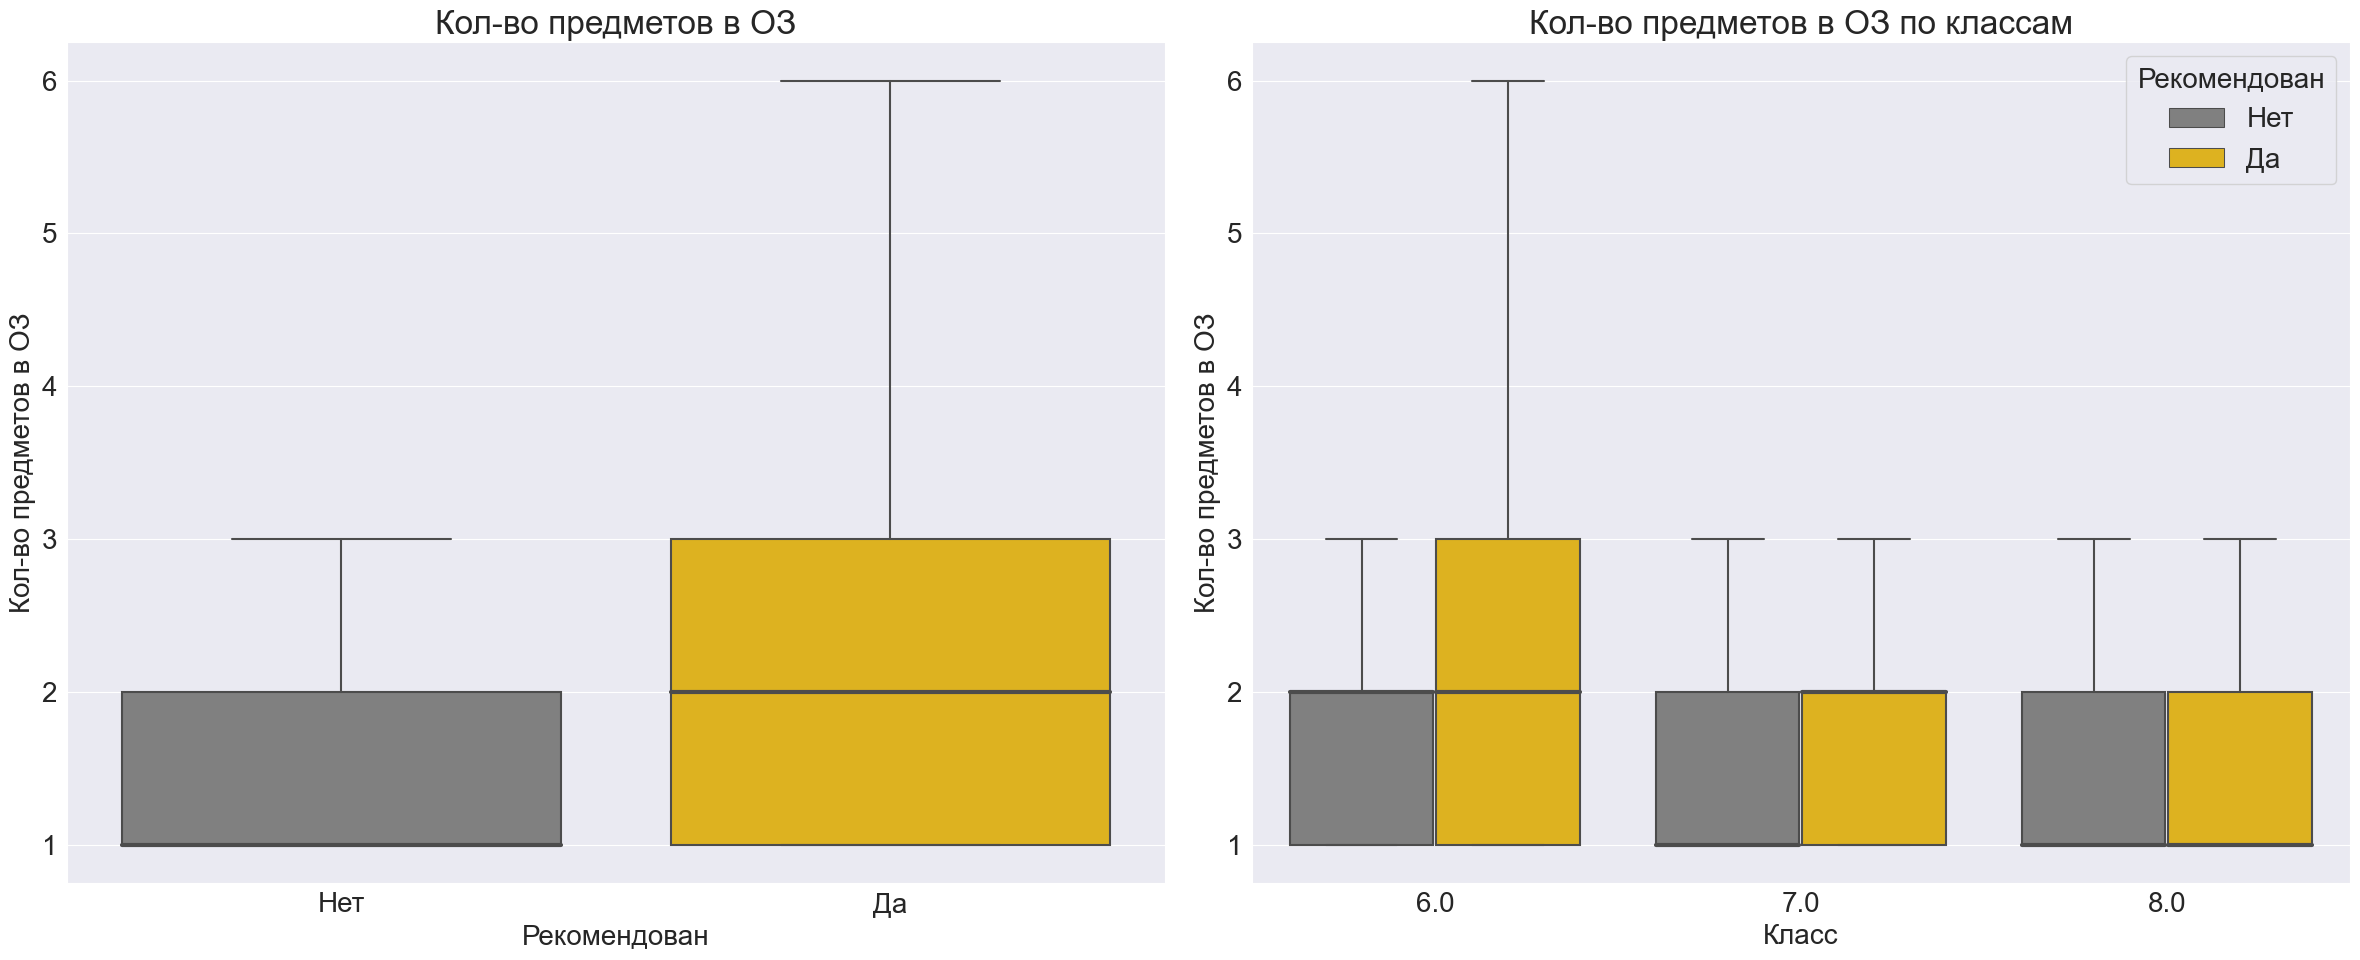

count  mean   std  min  25%  50%  75%   max
grade recomended                                             
6.0   0           438.0  1.98  1.46  1.0  1.0  2.0  2.0  14.0
      1            70.0  2.57  2.02  1.0  1.0  2.0  3.0  15.0
7.0   0           379.0  1.68  0.98  1.0  1.0  1.0  2.0   9.0
      1            47.0  1.81  1.04  1.0  1.0  2.0  2.0   6.0
8.0   0           341.0  1.48  0.90  1.0  1.0  1.0  2.0   7.0
      1            35.0  1.69  0.93  1.0  1.0  1.0  2.0   4.0

In [43]:
compare(feat_names[5], outliers=False)

- Успешные в среднем решают ОЗ в двух разных предметах. Неуспешные в 1.
- По классам мы видим разницу в медианах только в 7м классе.

#### <a id='toc1_6_3_3_'></a>[Результат ОЗ, %](#toc0_)

,count,mean,std,min,25%,50%,75%,max
recomended,,,,,,,,
0,1437.0,41.21,29.66,0.0,17.07,41.18,62.50,100.0
1,167.0,51.95,25.88,0.0,37.28,55.02,68.75,100.0


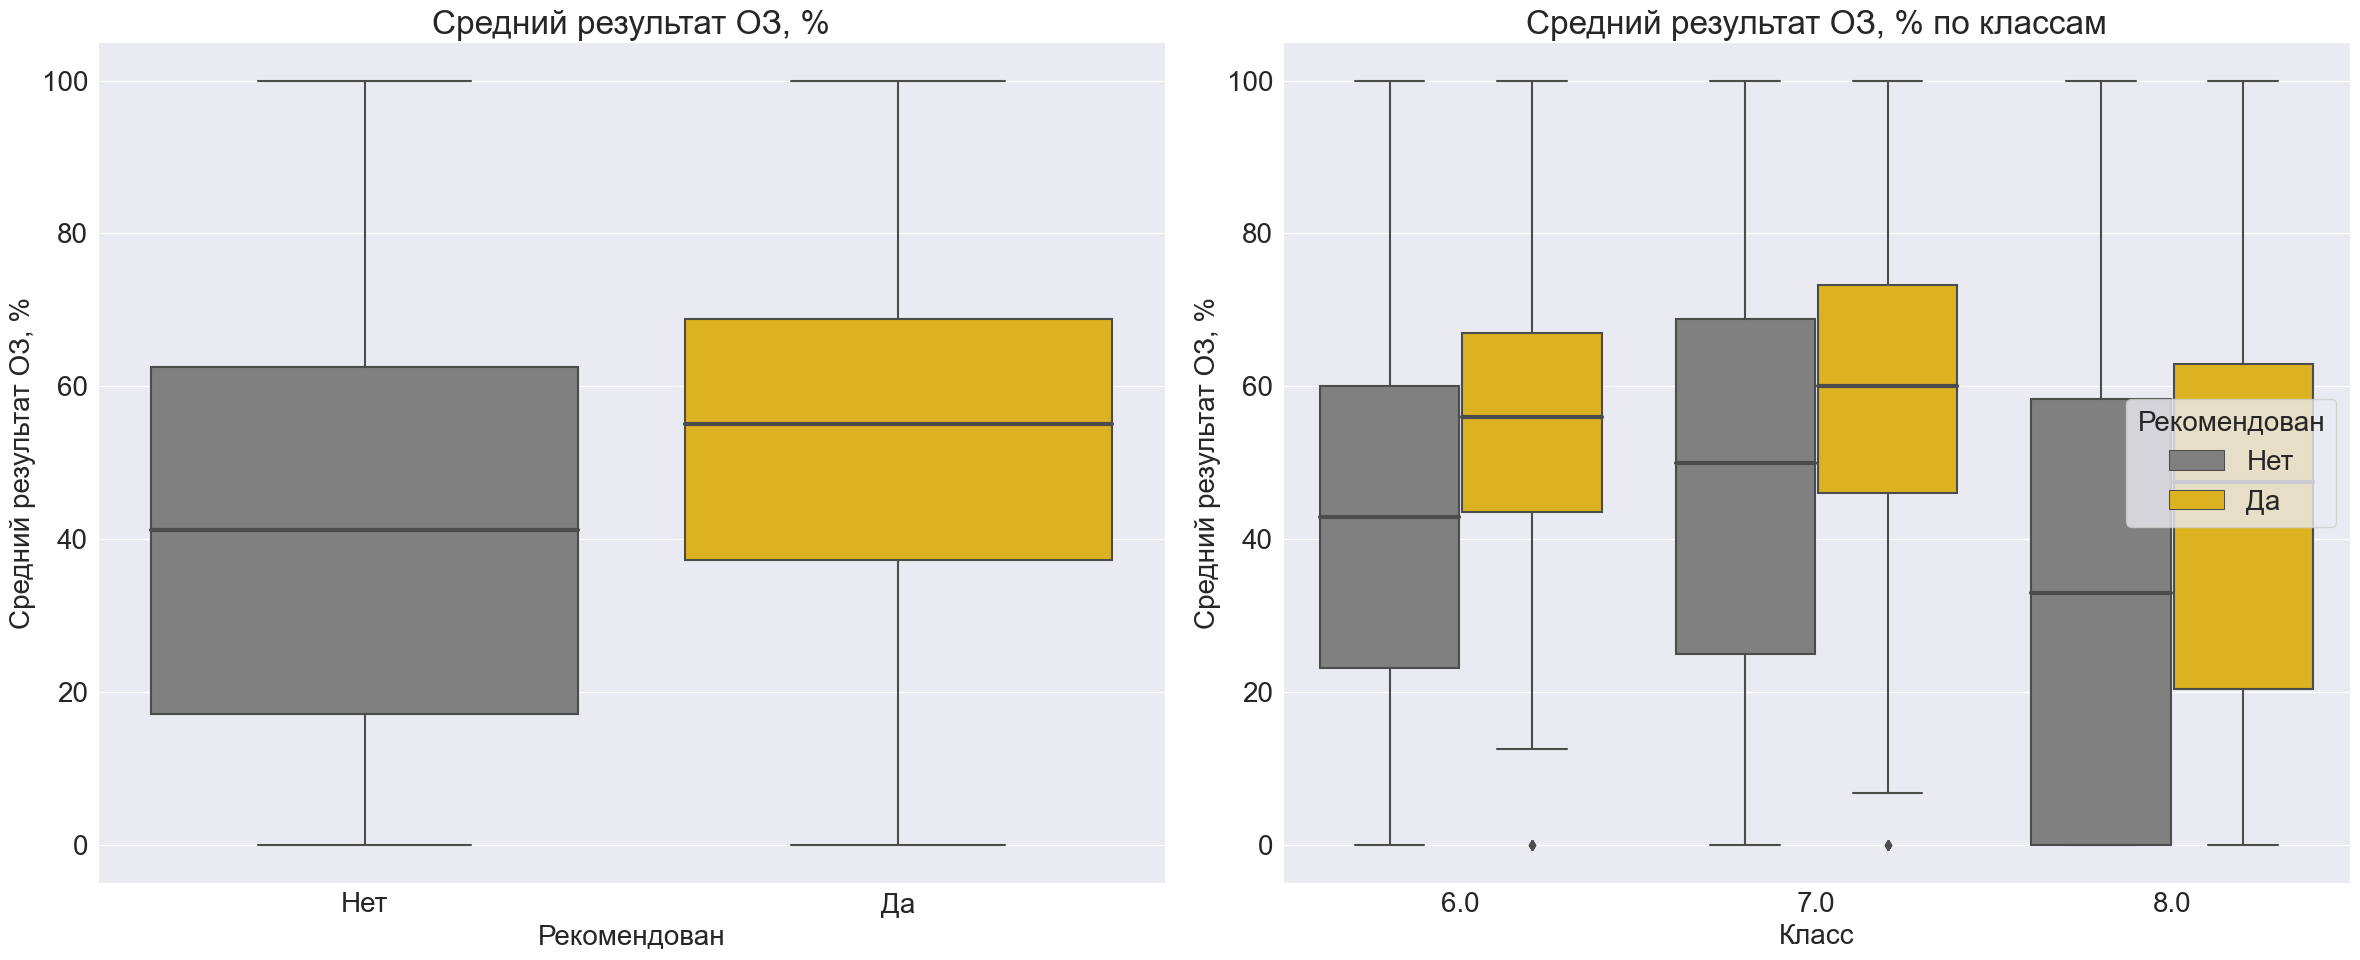

count   mean    std  min    25%    50%    75%    max
grade recomended                                                      
6.0   0           518.0  41.95  27.49  0.0  23.11  42.86  60.00  100.0
      1            74.0  53.02  21.27  0.0  43.47  55.98  66.90  100.0
7.0   0           441.0  47.10  29.39  0.0  25.00  50.00  68.75  100.0
      1            51.0  56.56  26.64  0.0  46.01  60.00  73.23  100.0
8.0   0           478.0  34.99  31.00  0.0   0.00  32.90  58.33  100.0
      1            42.0  44.49  30.91  0.0  20.36  47.44  62.93  100.0

In [45]:
compare(feat_names[6], outliers=True)

- Существенная разница как в общем, так и по классам. Успешные лучше пишут ОЗ
- Видим большую разницу между классами
- Медианы в целом 41% и 55%.

### <a id='toc1_6_4_'></a>[Курсы](#toc0_)

#### <a id='toc1_6_4_1_'></a>[Начатые курсы](#toc0_)

,count,mean,std,min,25%,50%,75%,max
recomended,,,,,,,,
0,891.0,2.07,1.93,1.0,1.0,1.0,2.0,18.0
1,131.0,3.13,2.69,1.0,1.0,2.0,4.0,13.0


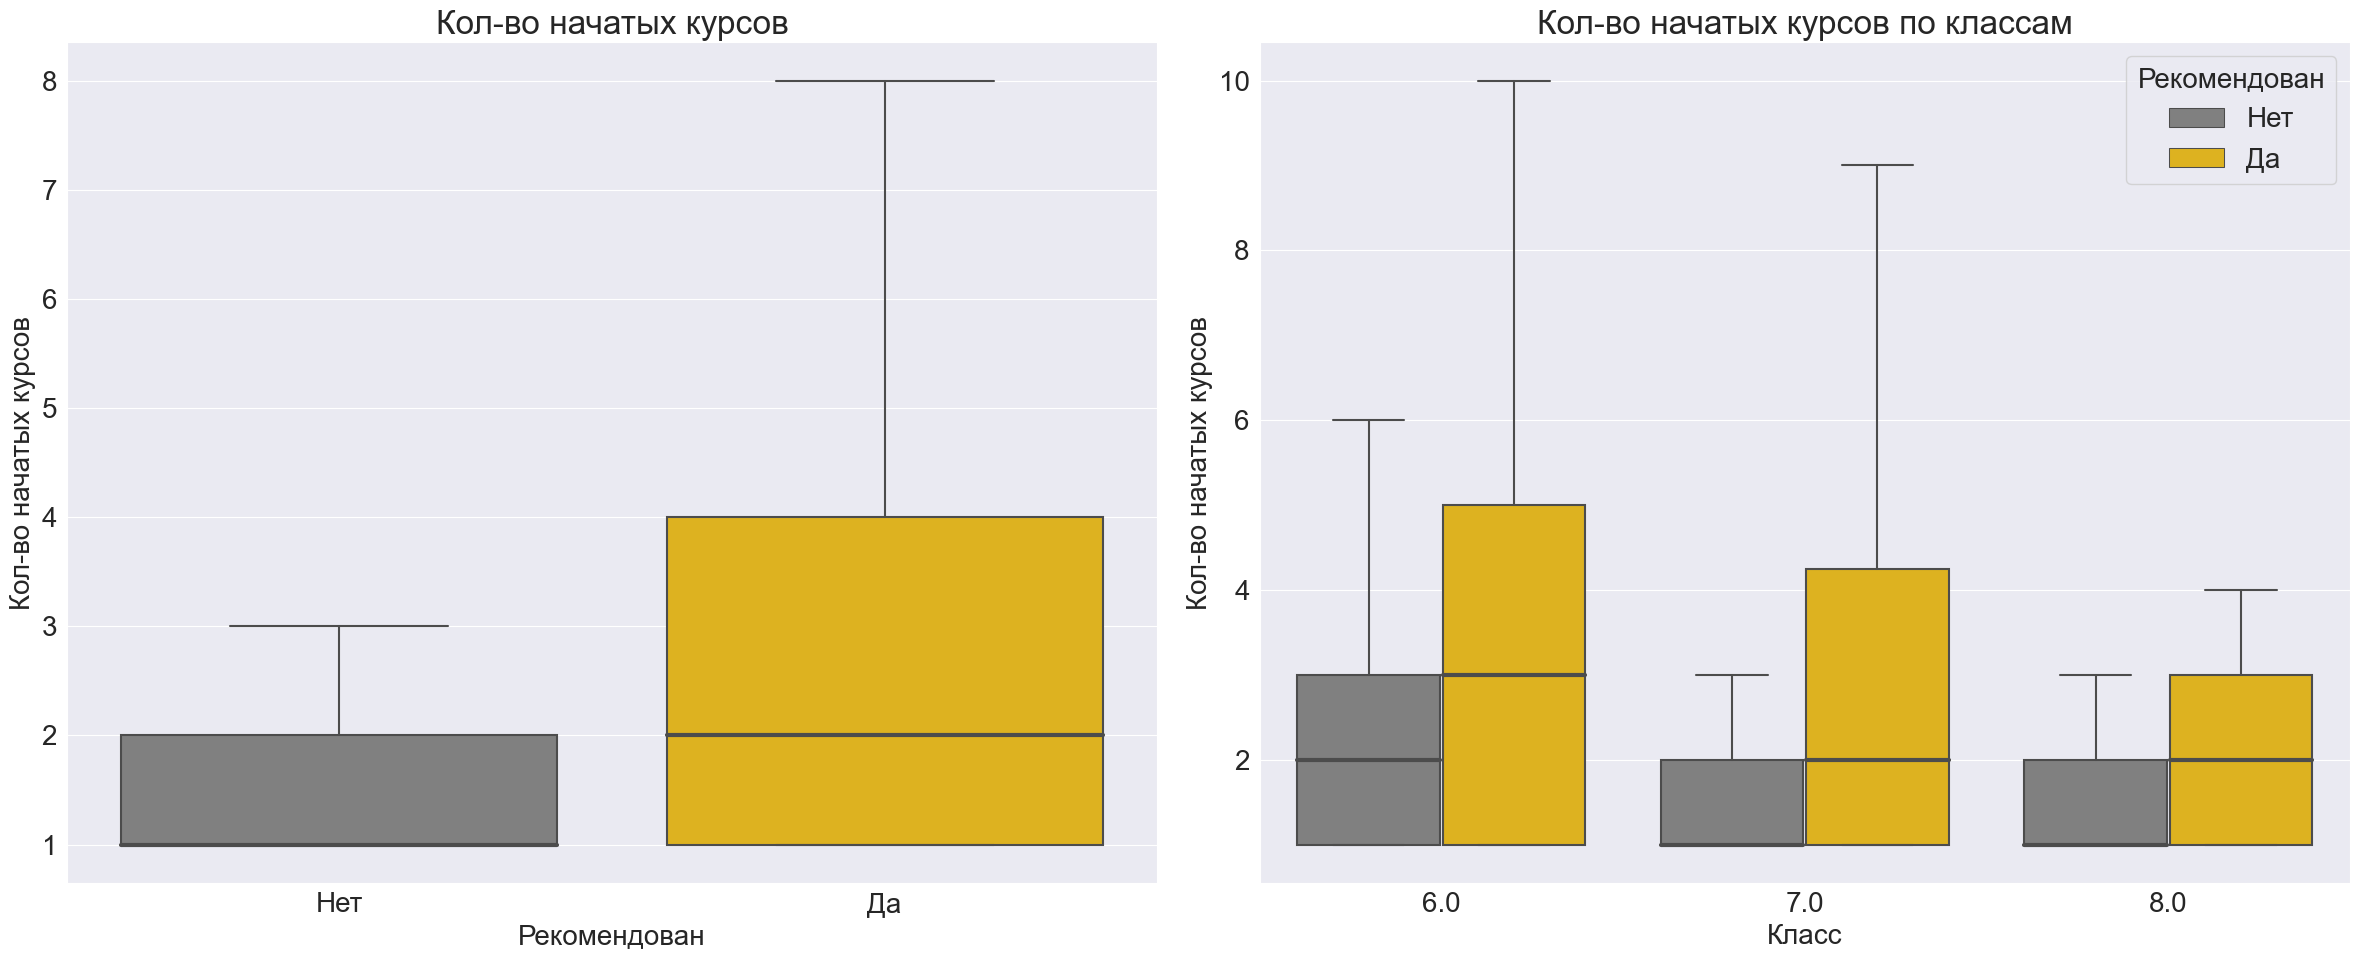

count  mean   std  min  25%  50%   75%   max
grade recomended                                              
6.0   0           327.0  2.65  2.41  1.0  1.0  2.0  3.00  18.0
      1            56.0  3.61  3.11  1.0  1.0  3.0  5.00  13.0
7.0   0           278.0  1.73  1.54  1.0  1.0  1.0  2.00  12.0
      1            36.0  2.89  2.20  1.0  1.0  2.0  4.25   9.0
8.0   0           286.0  1.74  1.43  1.0  1.0  1.0  2.00  11.0
      1            39.0  2.67  2.39  1.0  1.0  2.0  3.00  10.0

In [46]:
compare(feat_names[7], outliers=False)

- Четкая разница (медианы 1 и 2)
- По классам тоже

#### <a id='toc1_6_4_2_'></a>[Курсы пройденные на 50%](#toc0_)

,count,mean,std,min,25%,50%,75%,max
recomended,,,,,,,,
0,615.0,1.45,1.13,1.0,1.0,1.0,1.0,13.0
1,111.0,2.17,2.07,1.0,1.0,1.0,2.0,11.0


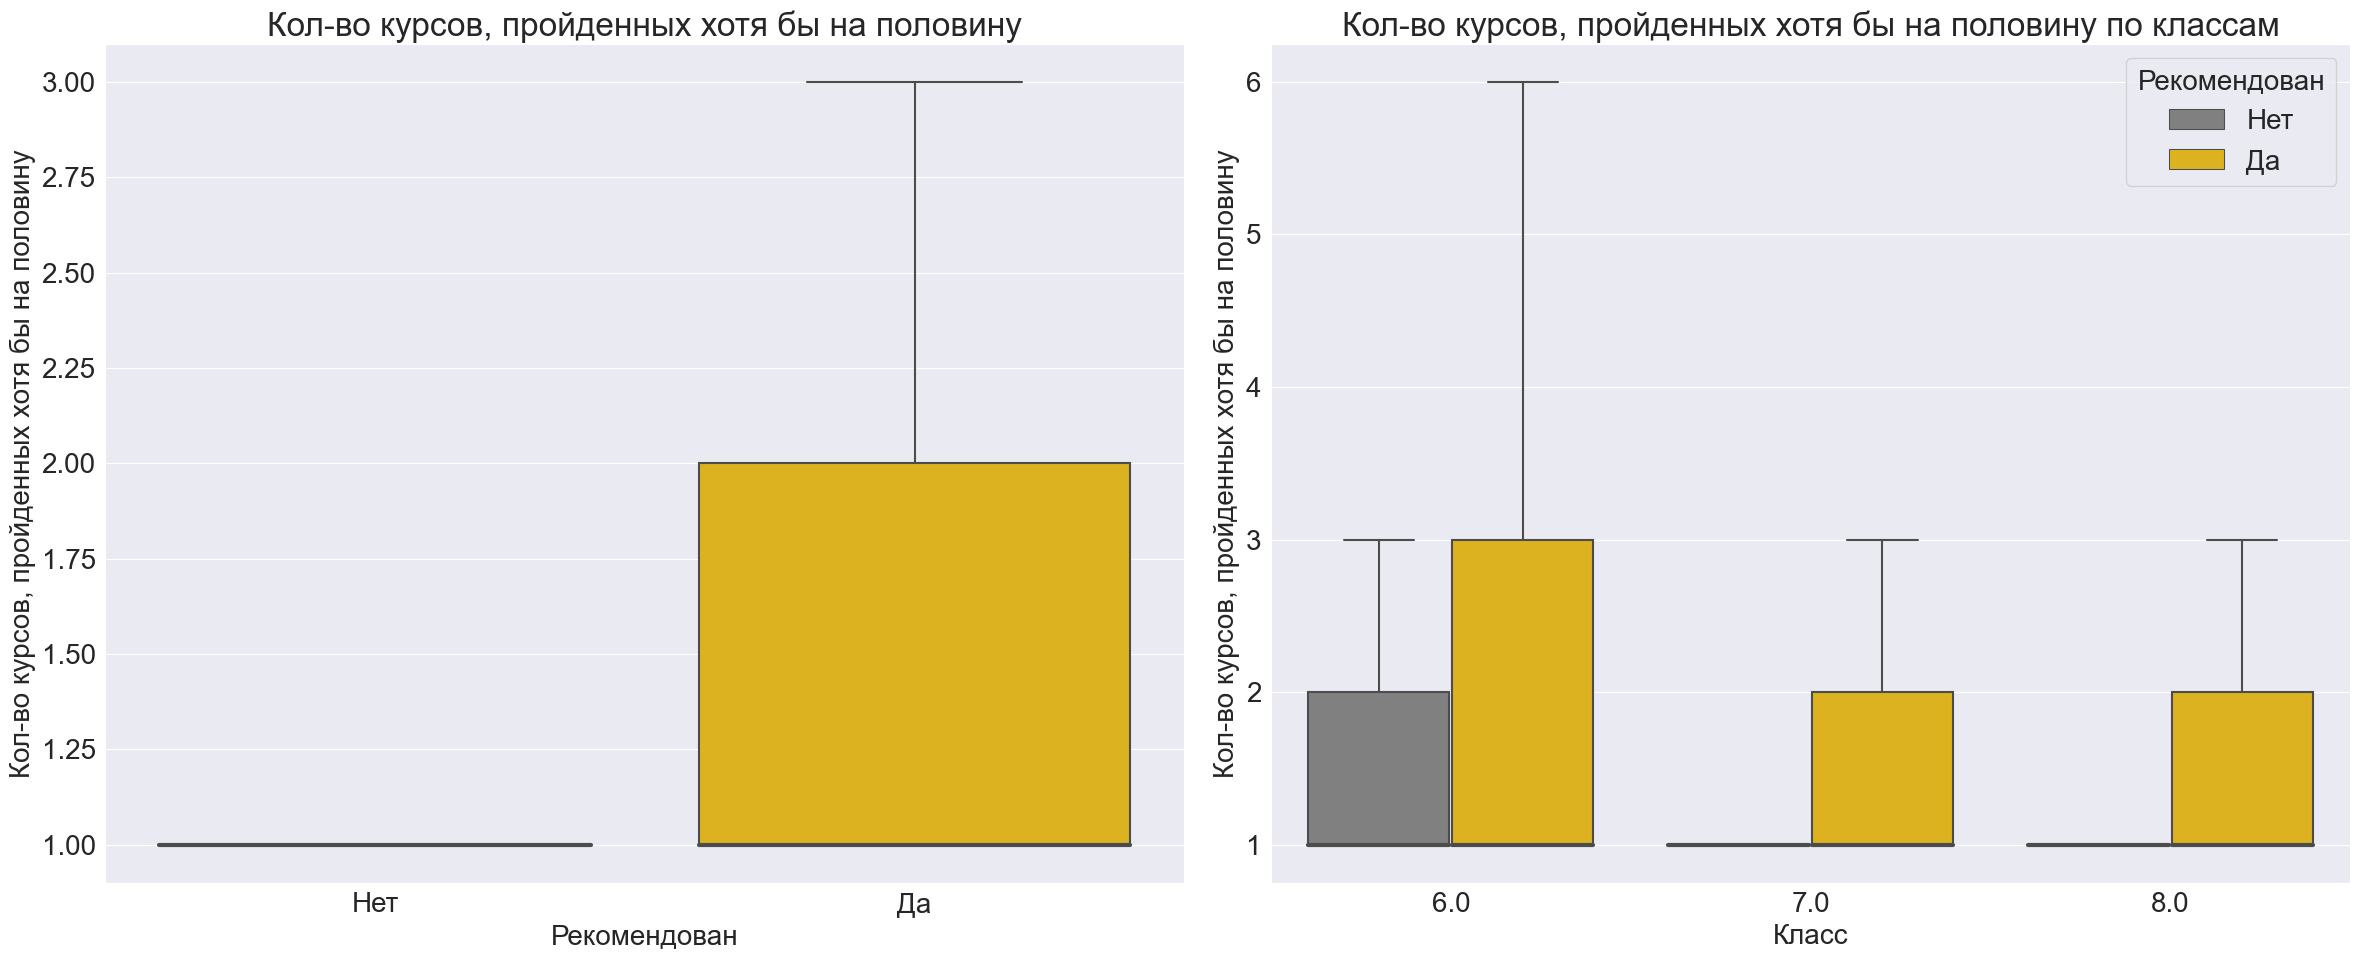

count  mean   std  min  25%  50%  75%   max
grade recomended                                             
6.0   0           237.0  1.75  1.50  1.0  1.0  1.0  2.0  13.0
      1            50.0  2.50  2.38  1.0  1.0  1.0  3.0  11.0
7.0   0           194.0  1.30  0.87  1.0  1.0  1.0  1.0   8.0
      1            34.0  1.76  1.30  1.0  1.0  1.0  2.0   6.0
8.0   0           184.0  1.22  0.62  1.0  1.0  1.0  1.0   6.0
      1            27.0  2.07  2.18  1.0  1.0  1.0  2.0   9.0

In [47]:
compare(feat_names[8], outliers=False)

- Медианы для успешных - 0, для неуспешных - 0
- Верхние квартили выше у успешных во всех классах

### <a id='toc1_6_5_'></a>[Олимпиады](#toc0_)

#### <a id='toc1_6_5_1_'></a>[Кол-во начатых олимпиад](#toc0_)

,count,mean,std,min,25%,50%,75%,max
recomended,,,,,,,,
0,568.0,1.08,0.29,1.0,1.0,1.0,1.0,3.0
1,111.0,1.16,0.39,1.0,1.0,1.0,1.0,3.0


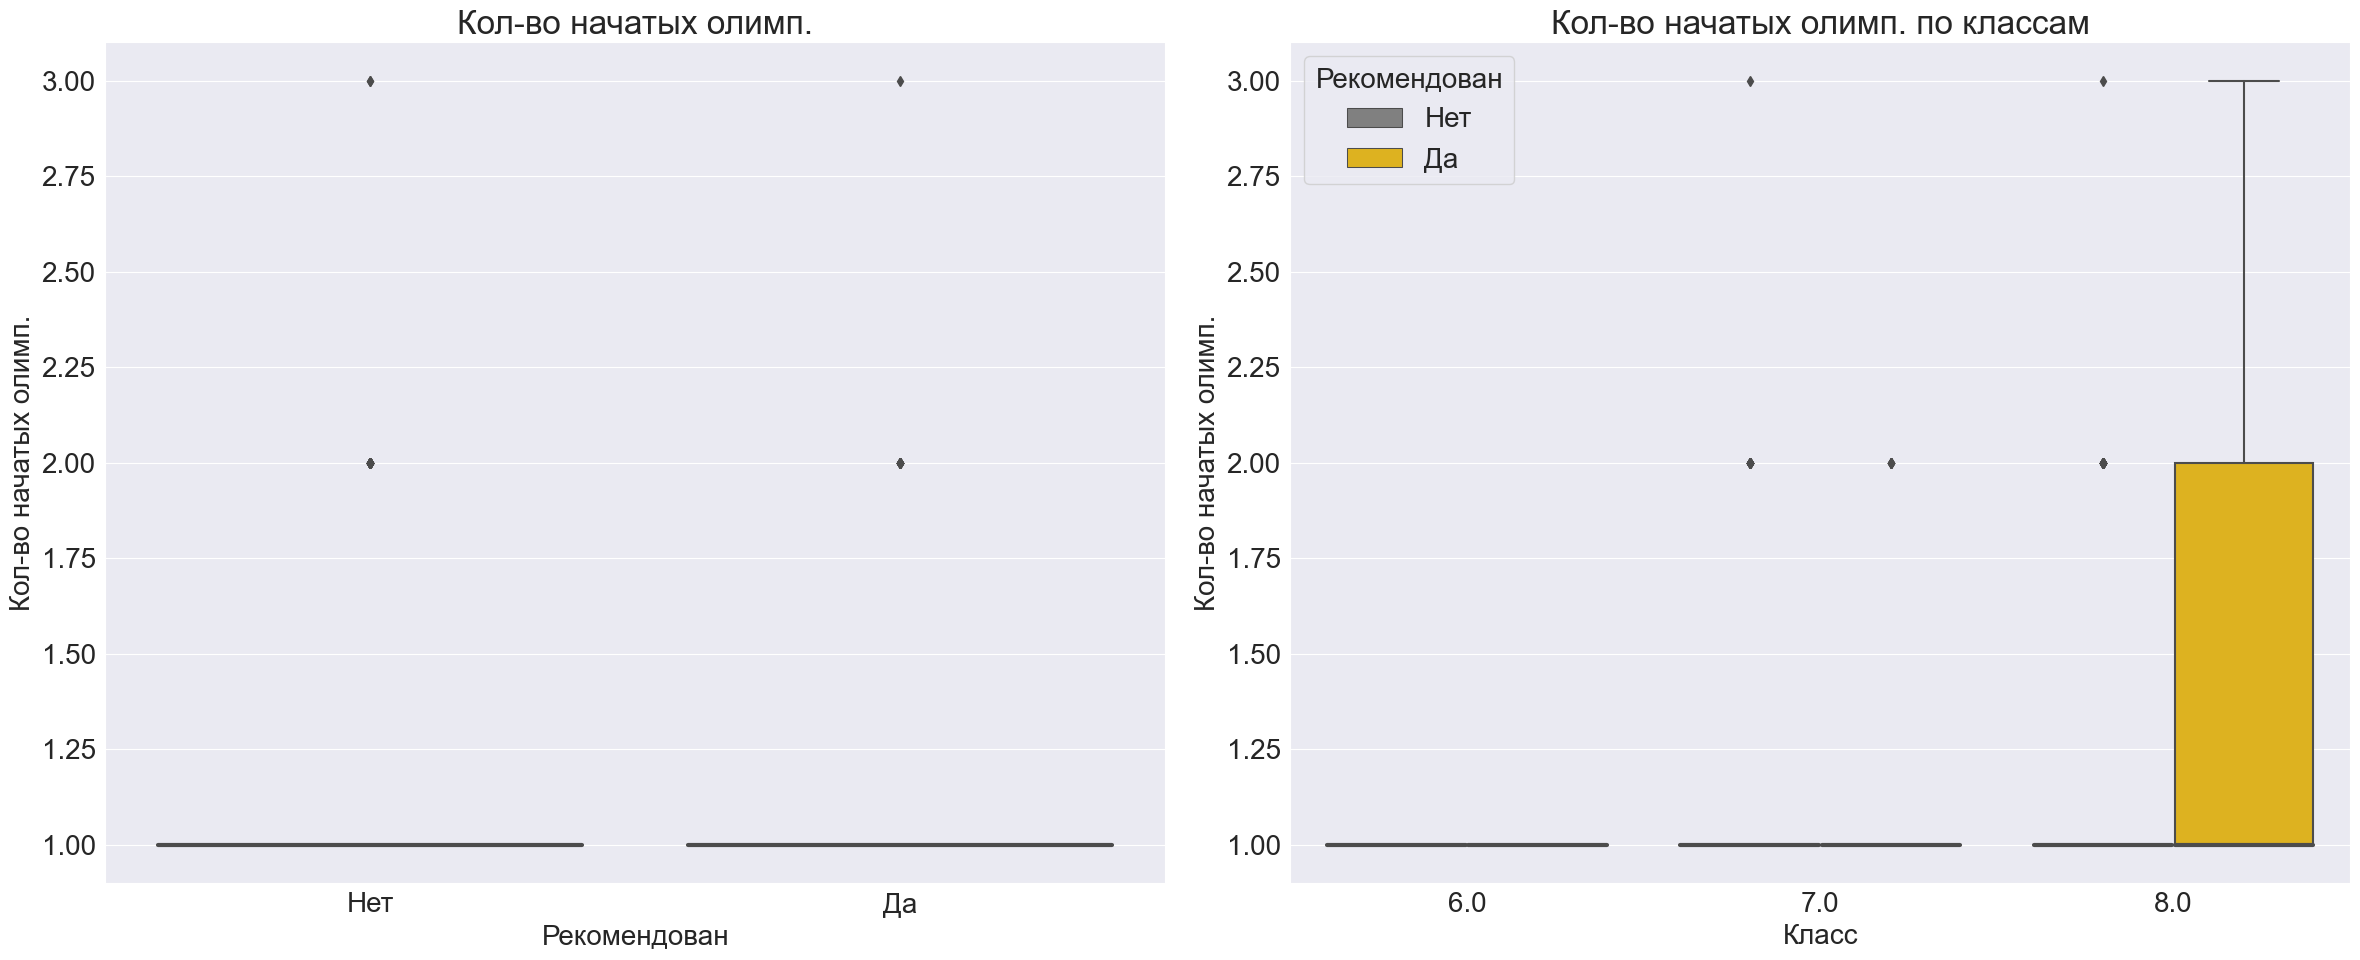

count  mean   std  min  25%  50%  75%  max
grade recomended                                            
6.0   0           165.0  1.00  0.00  1.0  1.0  1.0  1.0  1.0
      1            49.0  1.00  0.00  1.0  1.0  1.0  1.0  1.0
7.0   0           178.0  1.11  0.33  1.0  1.0  1.0  1.0  3.0
      1            31.0  1.23  0.43  1.0  1.0  1.0  1.0  2.0
8.0   0           225.0  1.12  0.34  1.0  1.0  1.0  1.0  3.0
      1            31.0  1.35  0.55  1.0  1.0  1.0  2.0  3.0

In [48]:
compare(feat_names[9])

- В целом медианы 0 и для нуспешных, и для успешных
- В 8 классе видим небольшое отличие в пользу успешных

### <a id='toc1_6_6_'></a>[Время жизни на платформе](#toc0_)

#### <a id='toc1_6_6_1_'></a>[Неделя первого логина в тек. уч. году](#toc0_)

,count,mean,std,min,25%,50%,75%,max
recomended,,,,,,,,
0,2979.0,9.90,7.55,0.0,3.0,9.0,16.0,26.0
1,237.0,5.89,6.56,0.0,1.0,3.0,9.0,26.0


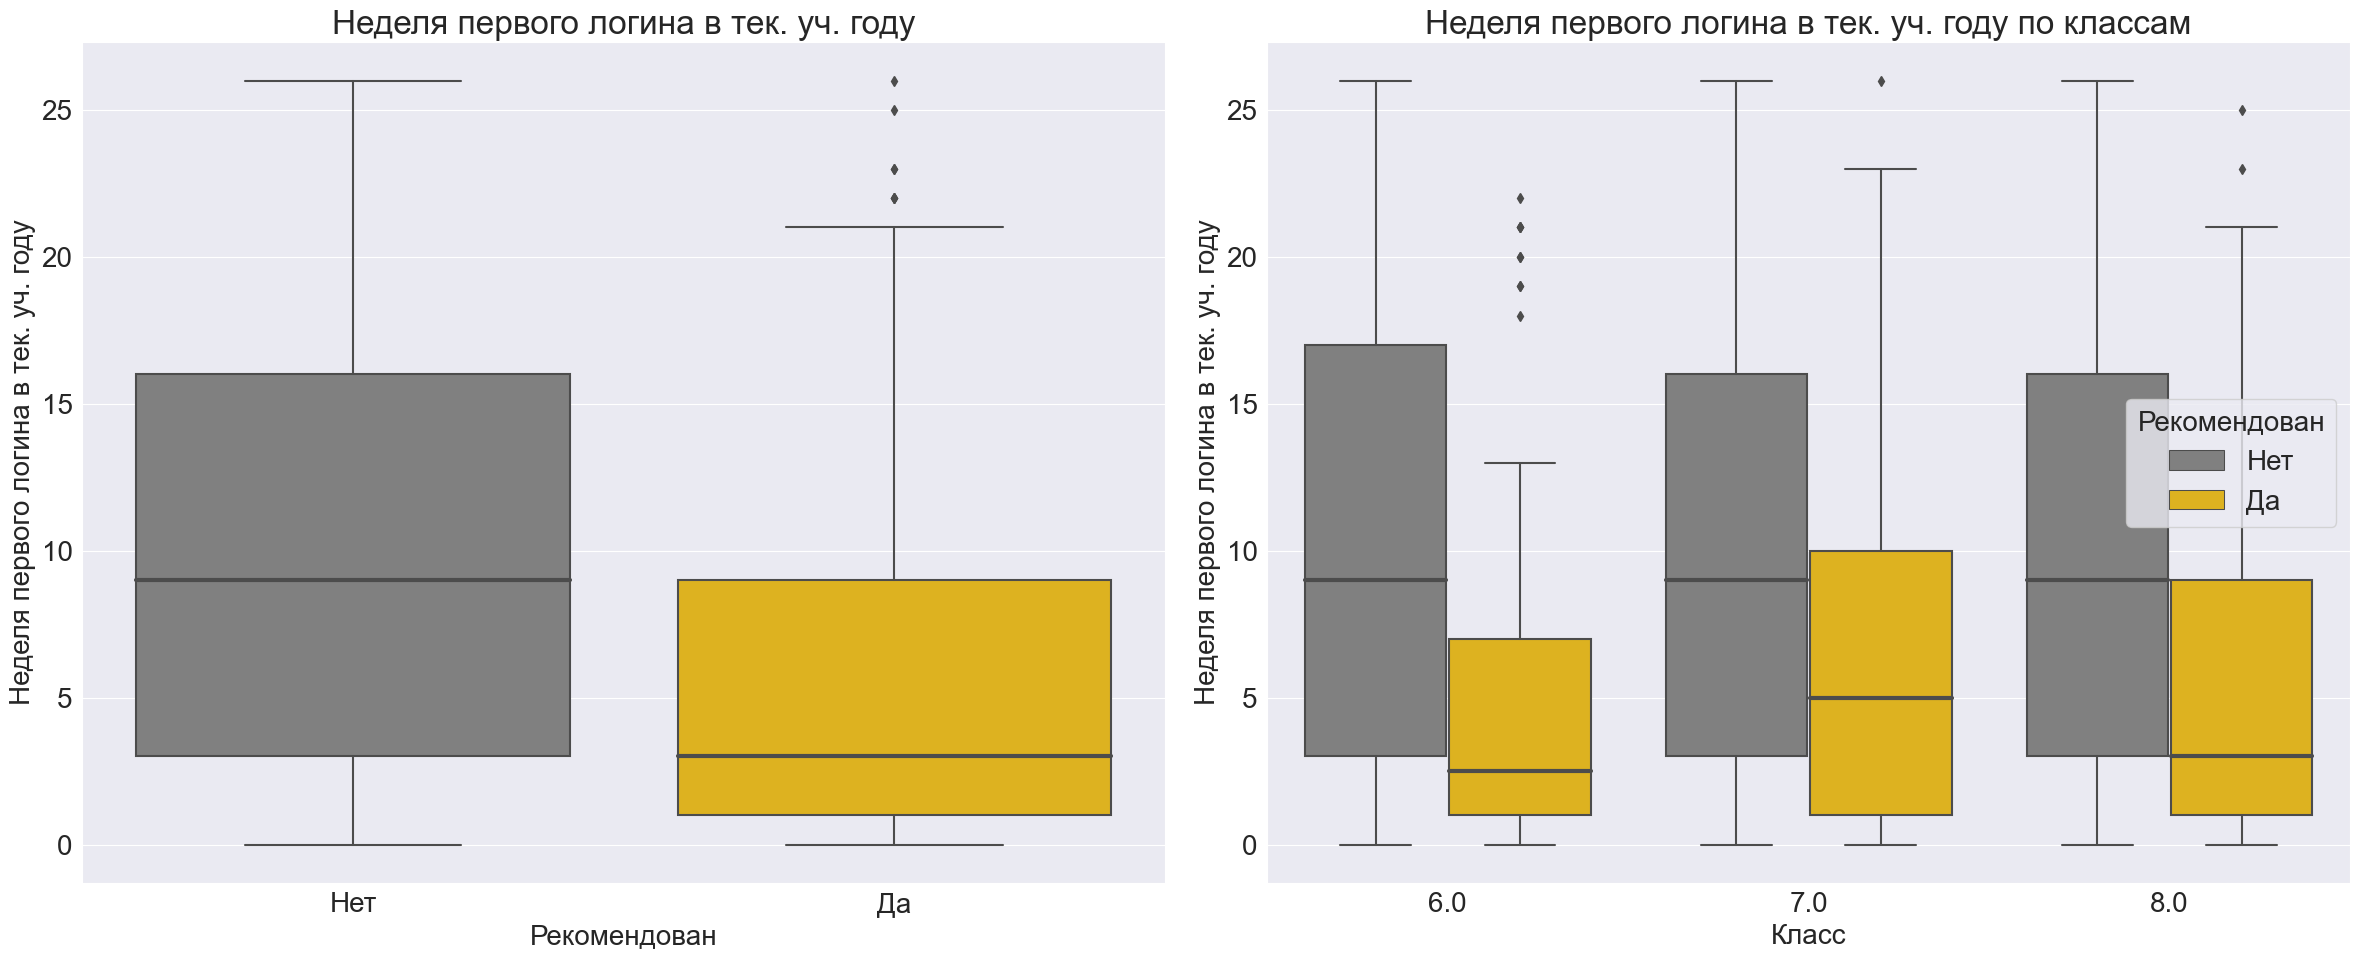

count  mean   std  min  25%  50%   75%   max
grade recomended                                               
6.0   0            970.0  9.91  7.71  0.0  3.0  9.0  17.0  26.0
      1             94.0  4.95  5.97  0.0  1.0  2.5   7.0  22.0
7.0   0            960.0  9.86  7.61  0.0  3.0  9.0  16.0  26.0
      1             82.0  6.94  6.94  0.0  1.0  5.0  10.0  26.0
8.0   0           1049.0  9.93  7.36  0.0  3.0  9.0  16.0  26.0
      1             61.0  5.93  6.78  0.0  1.0  3.0   9.0  25.0

In [50]:
compare(feat_names[10])

Успешные абитуриенты всегда приходят к нам раньше.

#### <a id='toc1_6_6_2_'></a>[Неделя первого логина от 1 сентября](#toc0_)

,count,mean,std,min,25%,50%,75%,max
recomended,,,,,,,,
0,2979.0,0.72,0.92,0.0,0.0,0.0,1.0,3.0
1,237.0,1.05,1.00,0.0,0.0,1.0,2.0,3.0


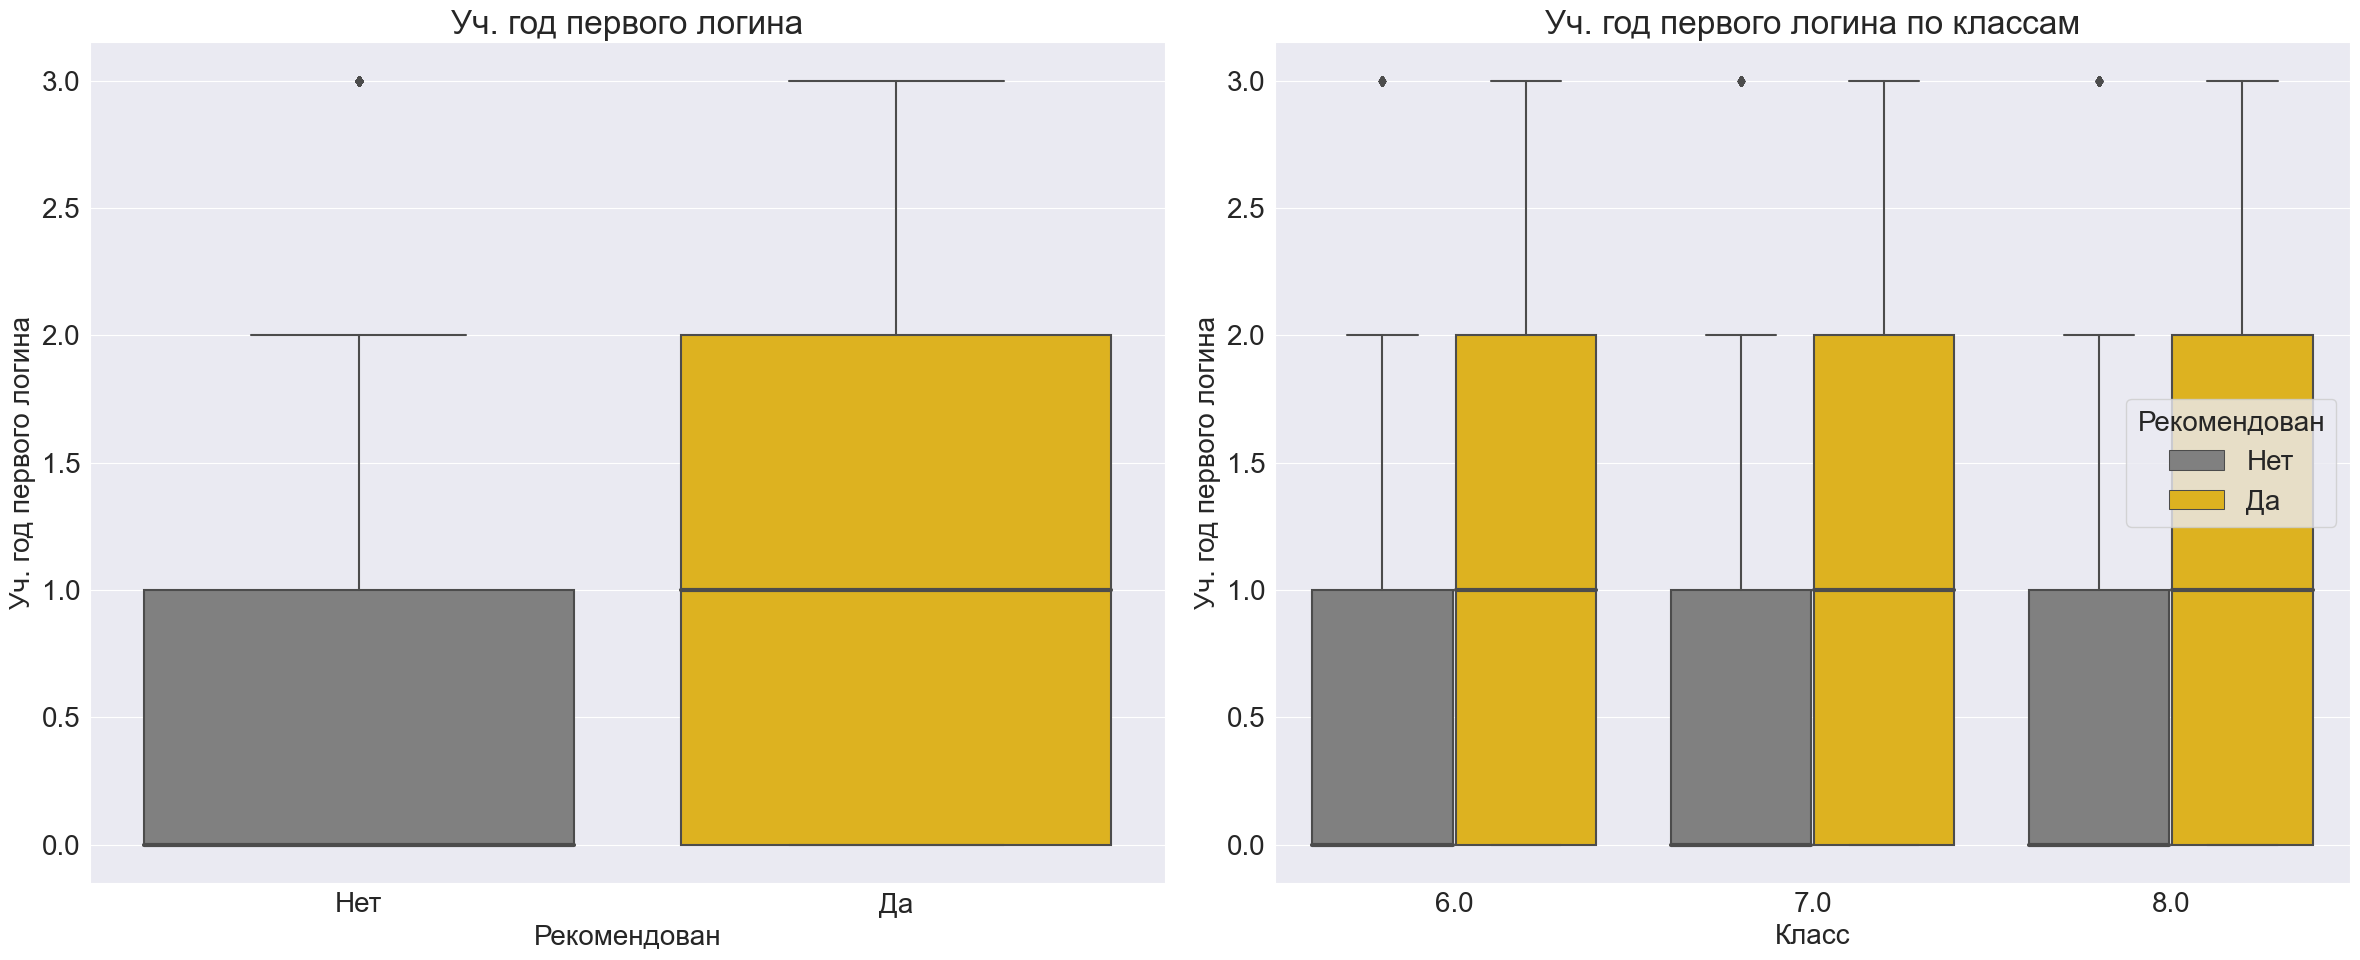

count  mean   std  min  25%  50%  75%  max
grade recomended                                             
6.0   0            970.0  0.58  0.82  0.0  0.0  0.0  1.0  3.0
      1             94.0  0.95  0.94  0.0  0.0  1.0  2.0  3.0
7.0   0            960.0  0.75  0.90  0.0  0.0  0.0  1.0  3.0
      1             82.0  1.01  0.90  0.0  0.0  1.0  2.0  3.0
8.0   0           1049.0  0.82  1.01  0.0  0.0  0.0  1.0  3.0
      1             61.0  1.25  1.19  0.0  0.0  1.0  2.0  3.0

In [52]:
compare(feat_names[11])

- Успешные абитуриенты в среднем уже провели на платформе 1 год.
- Неуспешные чаще приходят в текущем году впервые

### <a id='toc1_6_7_'></a>[Неделя логина в год регистрации](#toc0_)

,count,mean,std,min,25%,50%,75%,max
recomended,,,,,,,,
0,2979.0,16.67,11.27,0.0,8.0,14.0,22.0,52.0
1,237.0,17.91,13.42,0.0,6.0,15.0,26.0,51.0


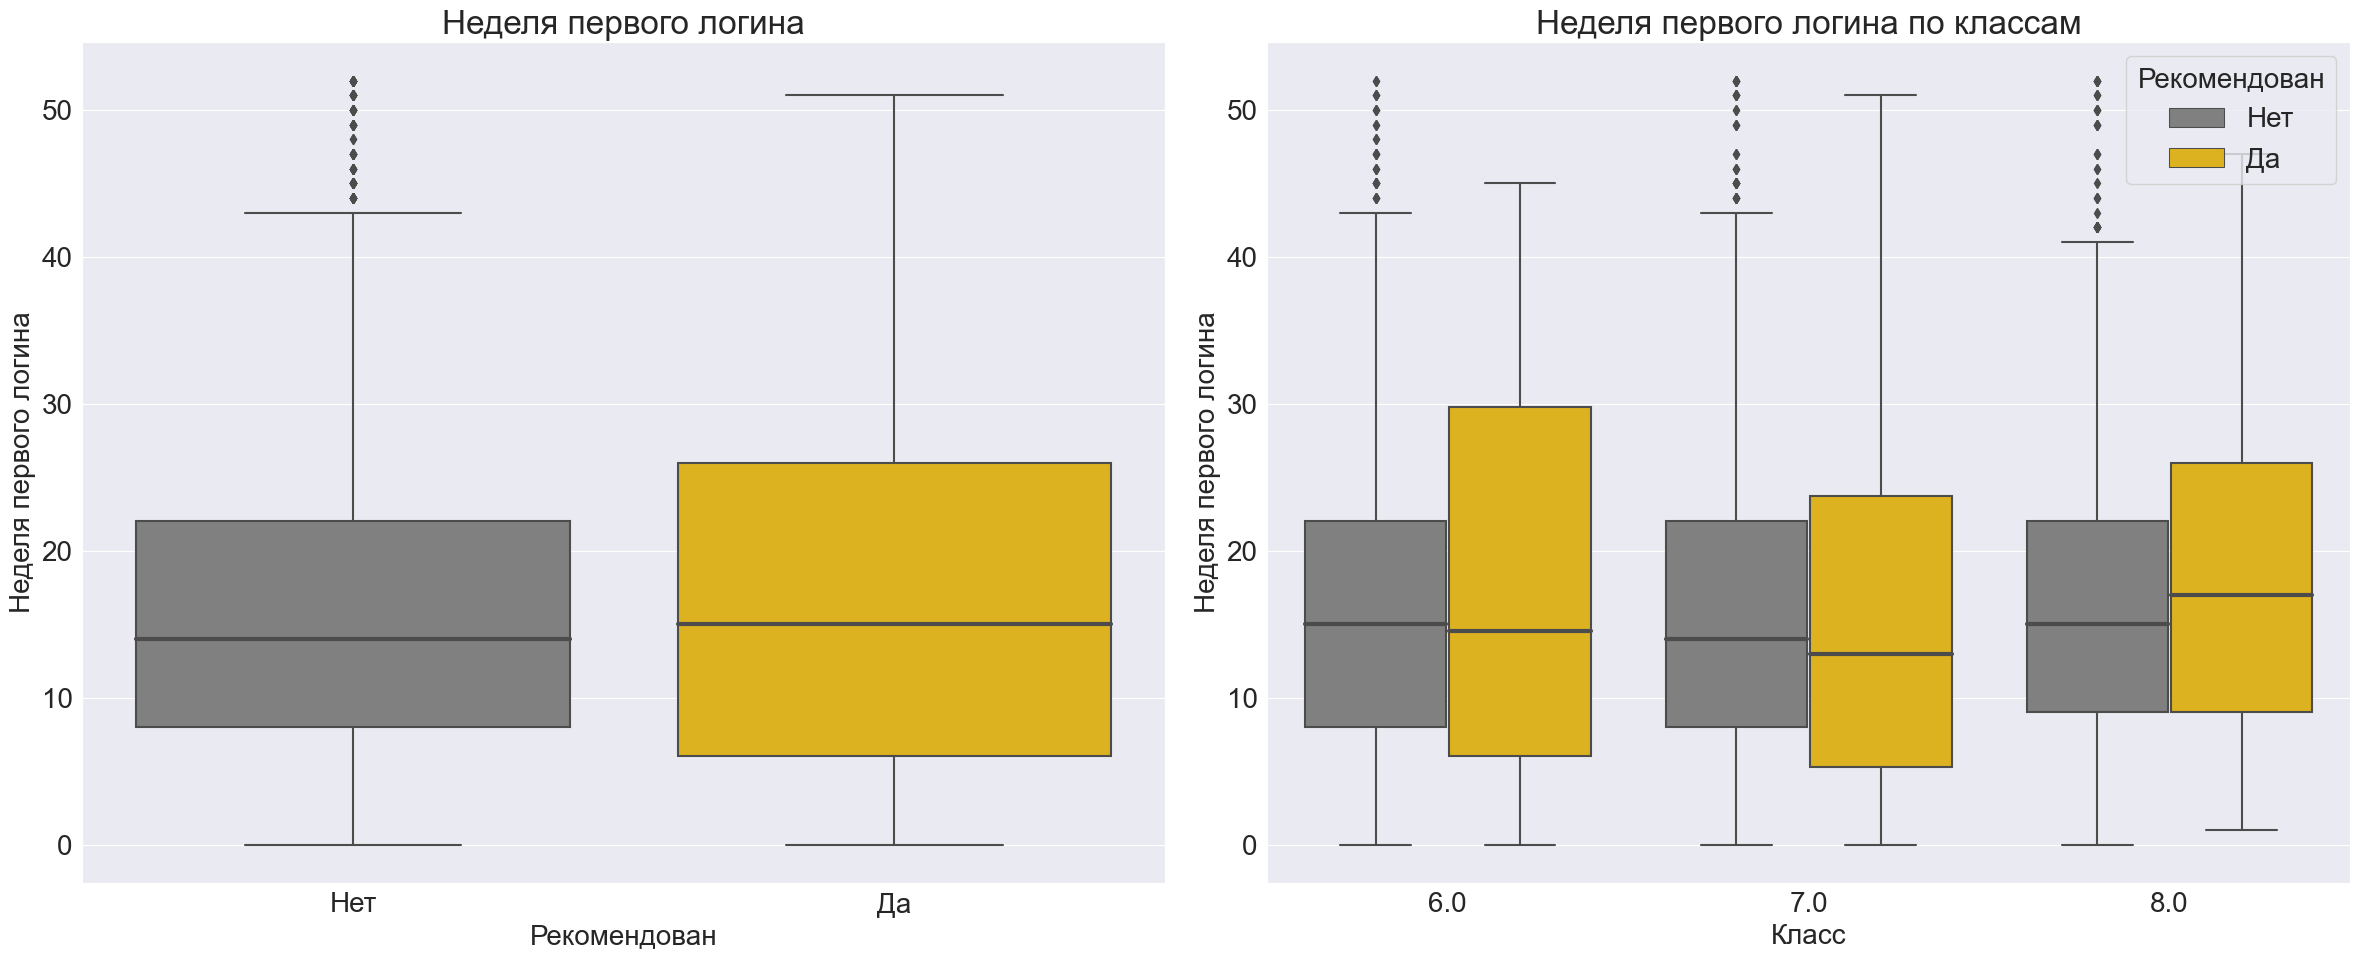

count   mean    std  min   25%   50%    75%   max
grade recomended                                                    
6.0   0            970.0  16.86  11.79  0.0  8.00  15.0  22.00  52.0
      1             94.0  18.45  14.05  0.0  6.00  14.5  29.75  45.0
7.0   0            960.0  16.44  11.43  0.0  8.00  14.0  22.00  52.0
      1             82.0  17.26  13.45  0.0  5.25  13.0  23.75  51.0
8.0   0           1049.0  16.70  10.63  0.0  9.00  15.0  22.00  52.0
      1             61.0  17.97  12.55  1.0  9.00  17.0  26.00  47.0

In [53]:
compare(feat_names[12])

Тут сложно выделить какую-то тенденцию

## <a id='toc1_7_'></a>[Выводы](#toc0_)

Для многих значимых признаков распределение __сильно разнится для различных классов__. Это значит, что нужно либо обучаться на каждом классе в отдельности, либо включать класс как признак успешности (и может быть какие-то производные члены взаимодействия других признаков с классом)

Самые явные __признаки успешности абитуриента 2022-2023__

- Результат начальной попытки в тесте, среднее
- Общее кол-во тренировок, среднее
- Общий результат за тест, среднее
- Кол-во решенных ОЗ
- Средний результат ОЗ, %
- Кол-во начатых курсов
- Неделя первого логина в текущем уч. году

Остальные признаки, как мы увидели скорее всего не окажут положительного влияния на модель. Их можно либо не рассматривать вообще, либо тестировать, в зависимости от наших временных возможностей.

__ПОРТРЕТЫ__

|Признак|Успешный абитуриент|Неуспешный абитуриент|
|:---|:---|:---|
|Результат начальной попытки в тесте|68%|51%|
|Финальный результат в тесте|92%|76%|
|Кол-во тренировок|2.5|1|
|Решенные ОЗ|10|5|
|Кругозор ОЗ (кол-во предметов)|2|1|
|Результат ОЗ|55%|41%|
|Курсы 50%|2|1|
|Неделя логина в тек. году|3|9|